<div style="background: url(background.jpeg) no-repeat;background-size:cover;
-webkit-mask-image:-webkit-gradient(linear, left top, left bottom, from(rgba(0,0,0,1)), to(rgba(0,0,0,0)));
      mask-image: linear-gradient(to bottom, rgba(0,0,0,1), rgba(0,0,0,0));
  height: 300px;
  width: 100%;
  border: solid 1px #000;
  box-sizing: border-box;
  ">

</div>
<h1 style="text-align:center;top:200px;left:0;right:0;position:absolute;font-weight:900;">Prediktivno Bankarstvo</h1>


Za početak vršimo importovanje neophodnih biblioteka, klasa i funkcija i inicijalnu pripremu sveske:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, confusion_matrix, log_loss, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from collections import Counter
from itertools import pairwise
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_validate
from imblearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

Učitavamo dataset i pregledavamo osnovne informacije o njemu:
- struktura dataseta
- opsege vrednosti numeričkih kolona
- vrednosti unutar kategoričkih kolona
- tipove podataka
- nedostajuće vrednosti
- duplikate

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [9]:
for o in objects:
    print(o.capitalize() + ':\n', df[o].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Housing:
 ['no' 'yes' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [10]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 12


Duplikate odmah možemo izbaciti obzirom da ih ima veoma malo.

In [11]:
df = df.drop_duplicates(keep=False)
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


## Vizuelizacija podataka

Za početak, možemo proveriti kako je dataset balansiran.

<Axes: xlabel='y', ylabel='count'>

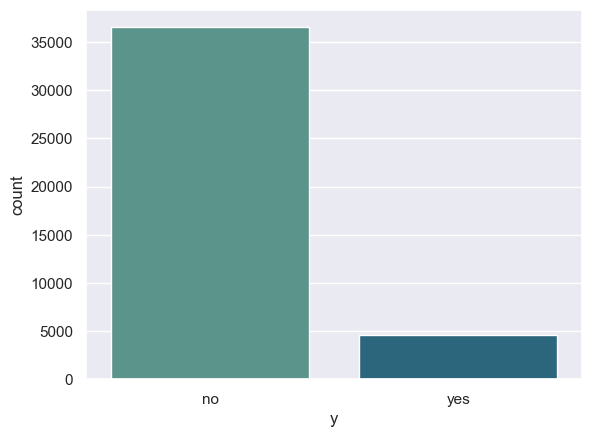

In [12]:
fig, ax = plt.subplots()

sns.countplot(x='y', data=df,
              palette=sns.color_palette("crest", 2))

Primećujemo da je dataset veoma loše balansiran sa mnogo većim brojem primeraka koji pripadaju klasi `no`. Na osnovu ovoga možemo pretpostaviti da će verovatno biti potrebno korišćenje neke od dostupnih tehnika kojom će se izvršiti balansiranje dataseta.

Zatim, za vizuelizaciju raspodele vrednosti po odgovarajućim kolonama možemo iskoristiti **histograme**.

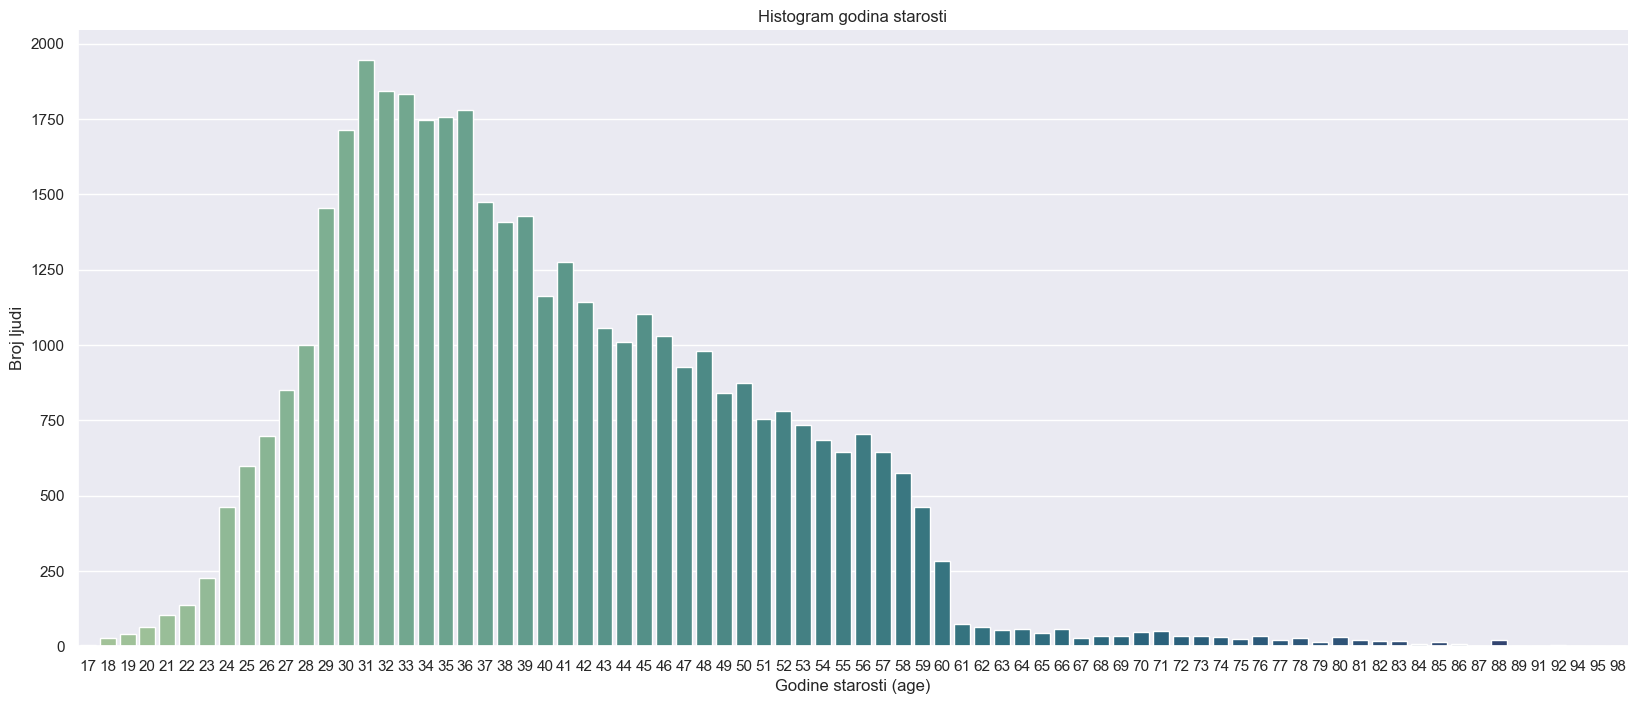

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

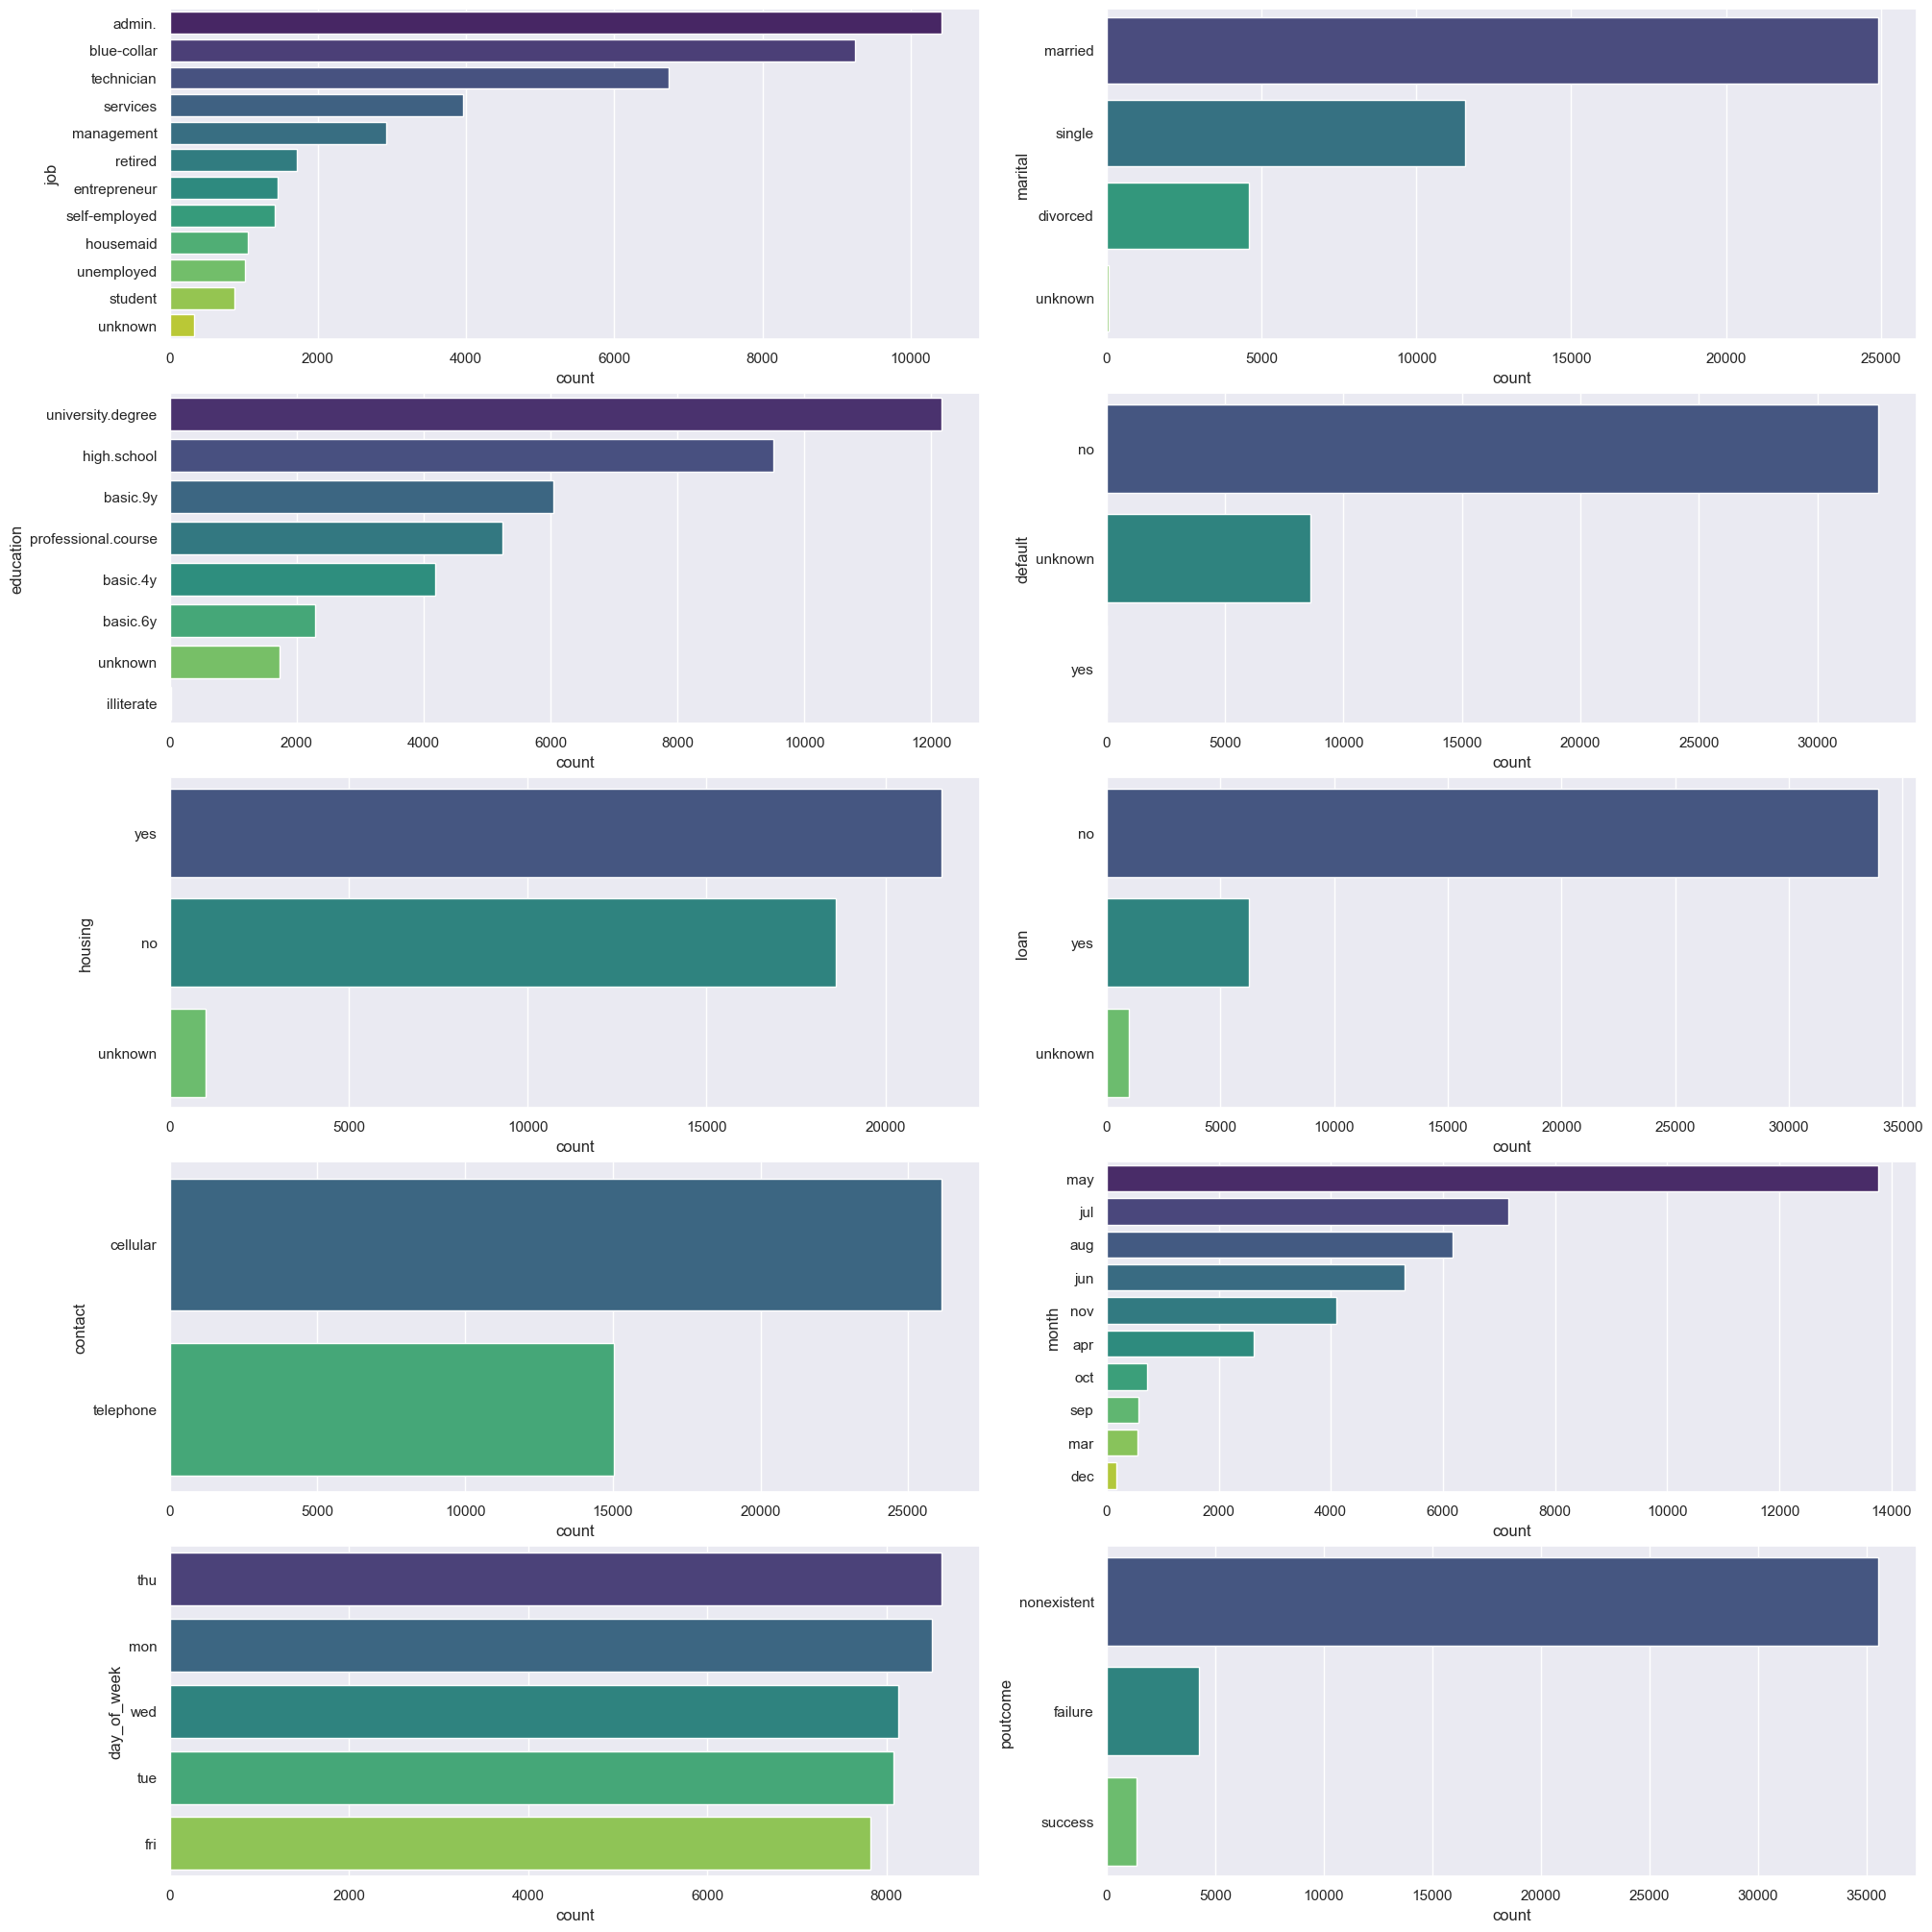

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

Na osnovu histograma se može zaključiti da neke od kolona sadrže veoma mali broj primeraka određenih vrednosti kao i nedostajuće vrednosti. U nastavku možemo proveriti koliko tačno ovakvih vrednosti ima.

In [15]:
# check unknown values
columns_with_unknown = ['job', 'housing',
                        'loan', 'default', 'marital', 'education']

for val in columns_with_unknown:
    print(f'Column {val}: \n')
    print((df.groupby(val).size()/df[val].count())*100)

Column job: 

job
admin.           25.303663
blue-collar      22.475950
entrepreneur      3.537071
housemaid         2.575066
management        7.103294
retired           4.168691
self-employed     3.452045
services          9.632203
student           2.125644
technician       16.361384
unemployed        2.463317
unknown           0.801671
dtype: float64
Column housing: 

housing
no         45.204548
unknown     2.405014
yes        52.390438
dtype: float64
Column loan: 

loan
no         82.416675
unknown     2.405014
yes        15.178311
dtype: float64
Column default: 

default
no         79.112817
unknown    20.879895
yes         0.007288
dtype: float64
Column marital: 

marital
divorced    11.199106
married     60.523759
single      28.082791
unknown      0.194345
dtype: float64
Column education: 

education
basic.4y               10.144787
basic.6y                5.563113
basic.9y               14.685162
high.school            23.100282
illiterate              0.043728
professional.

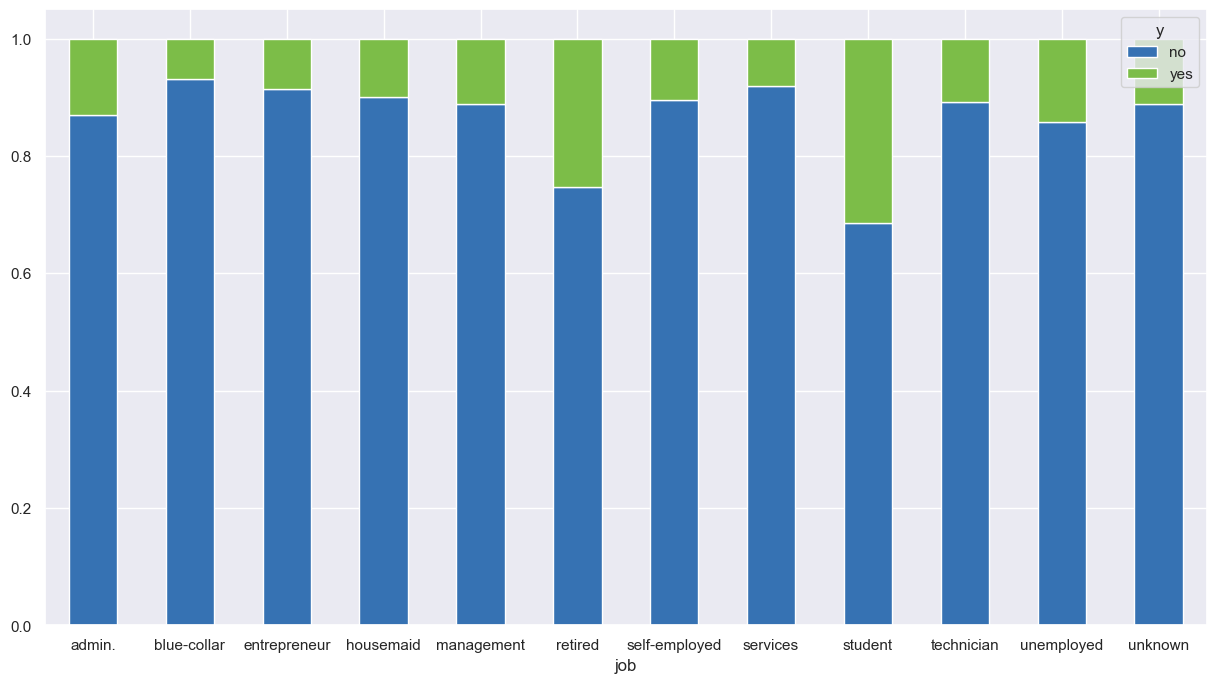

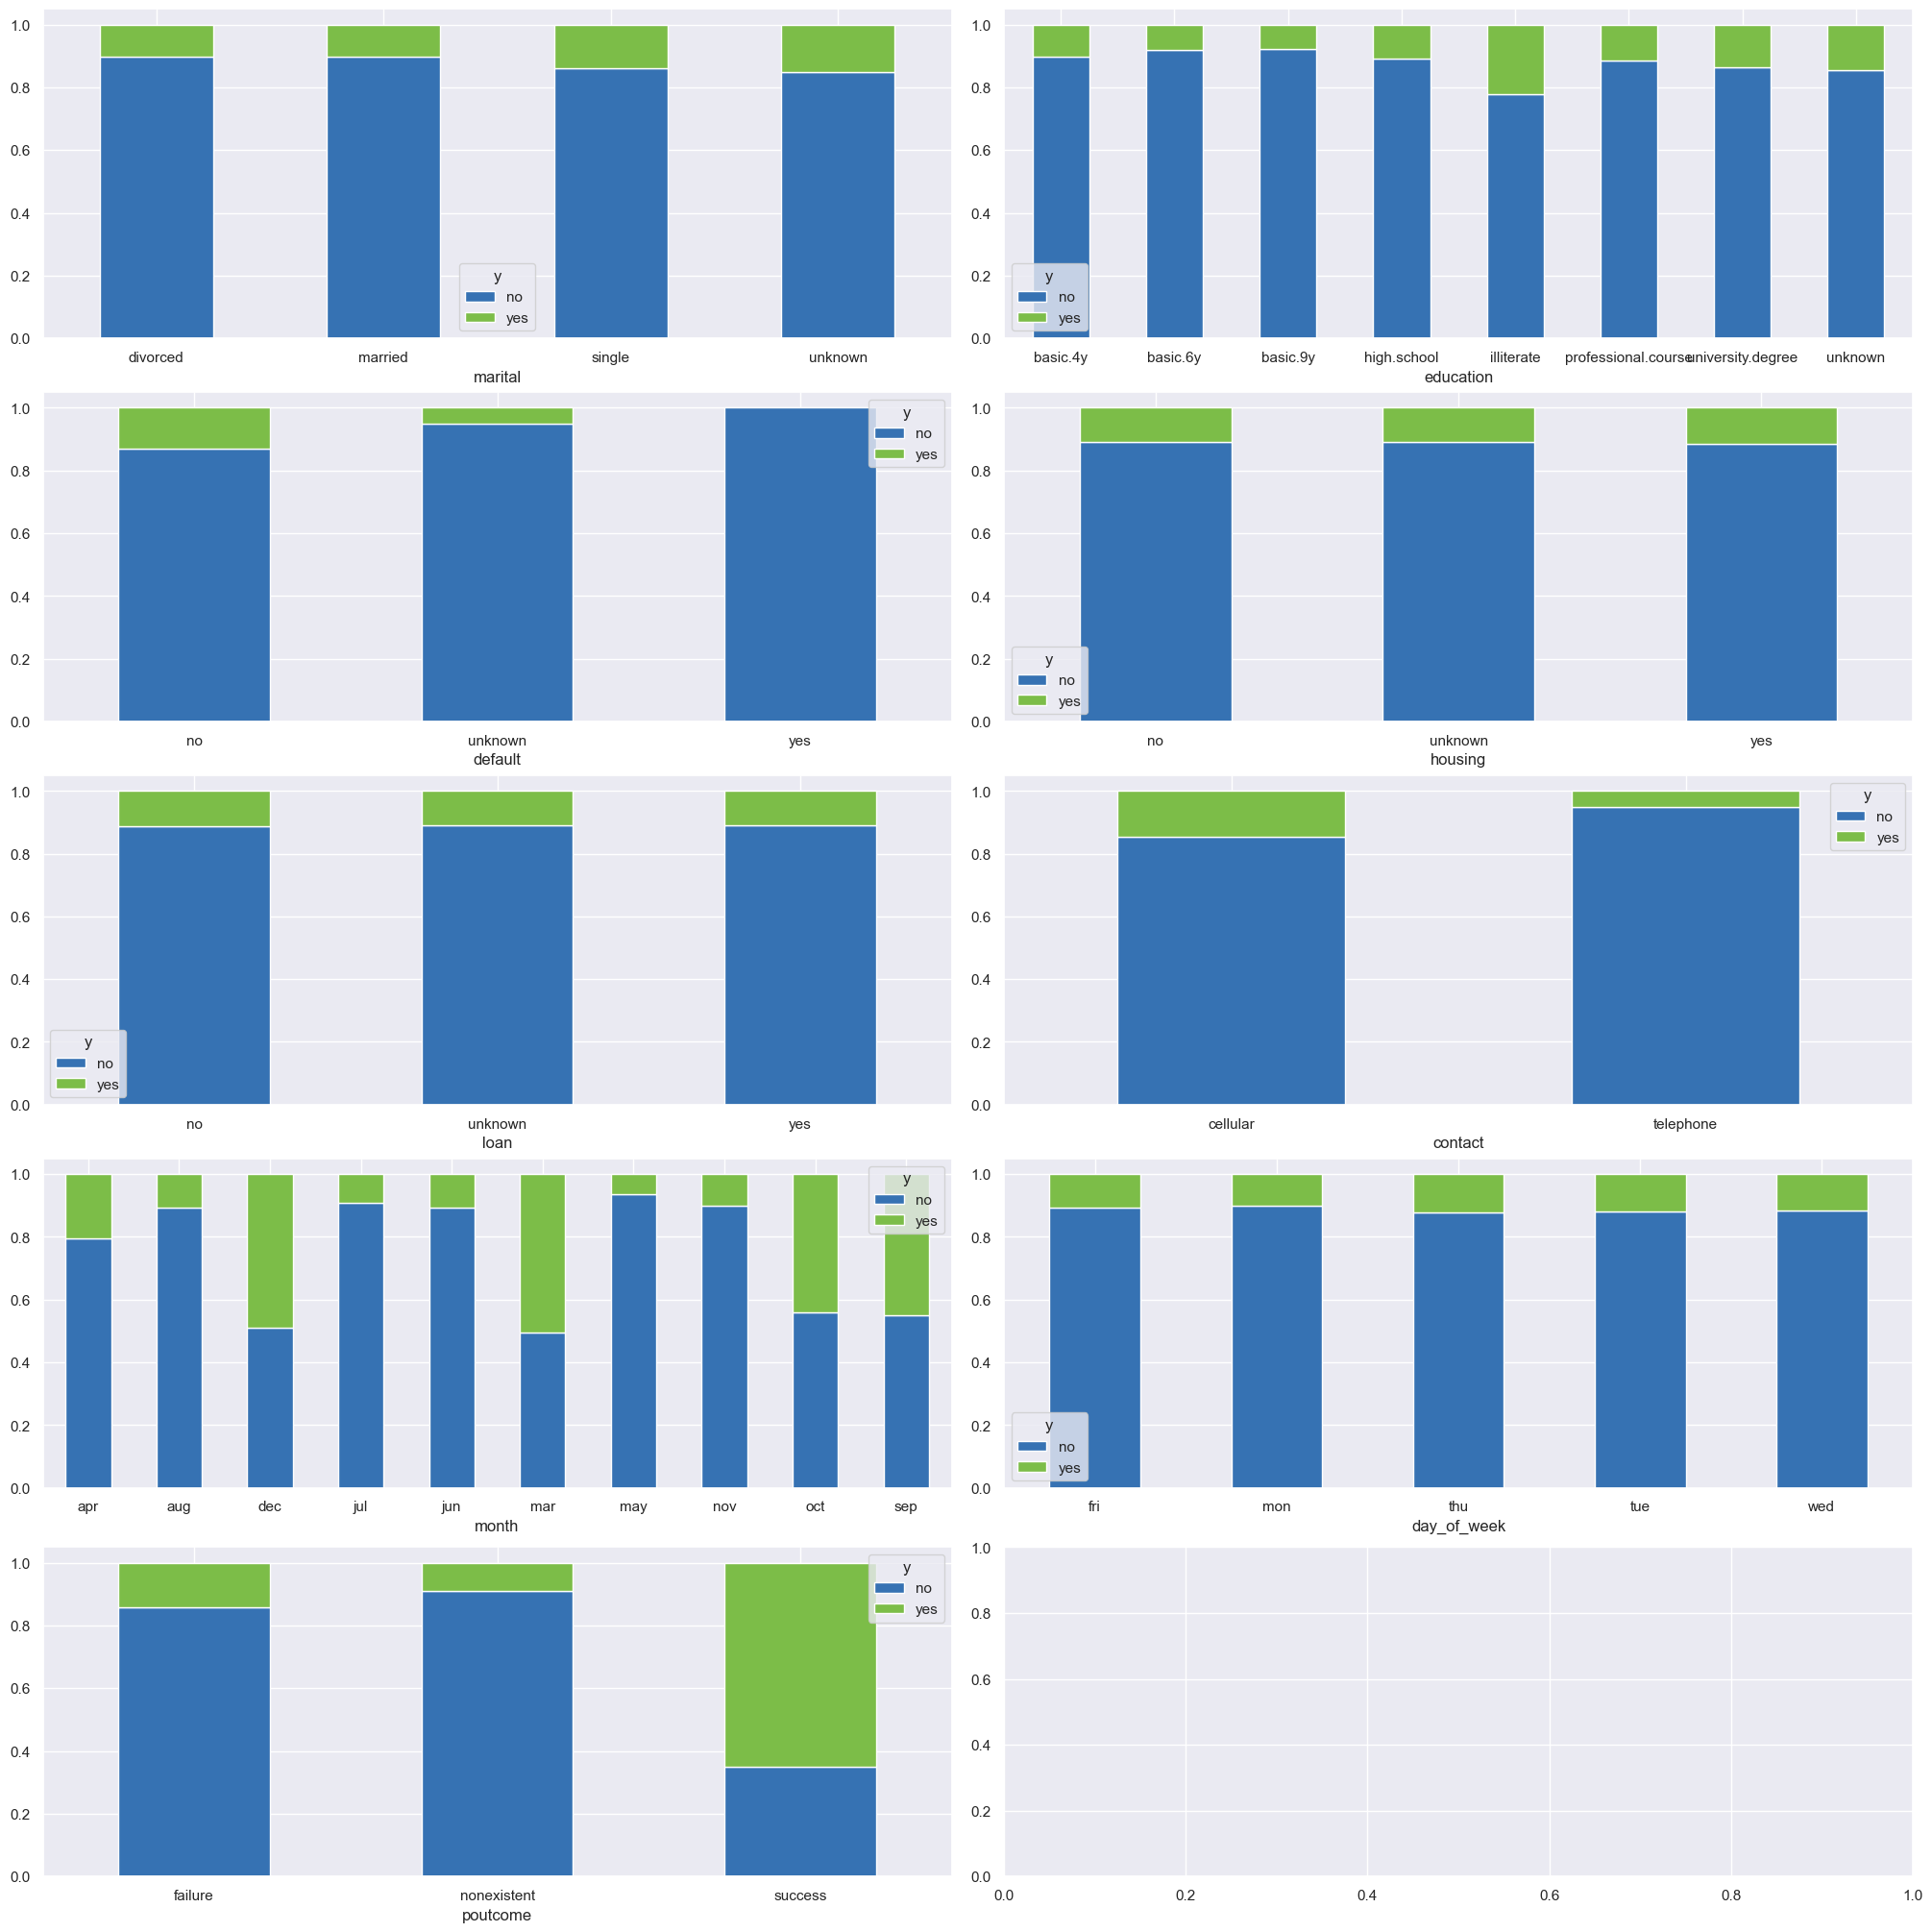

In [16]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8),
                     color=['#3672b3', '#7cbd48'])
plt.show()
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0,
                         color=['#3672b3', '#7cbd48'])
plt.show()

Zatim, možemo izvršiti vizuelizaciju raspodele vrednosti unutar numeričkih kolona.

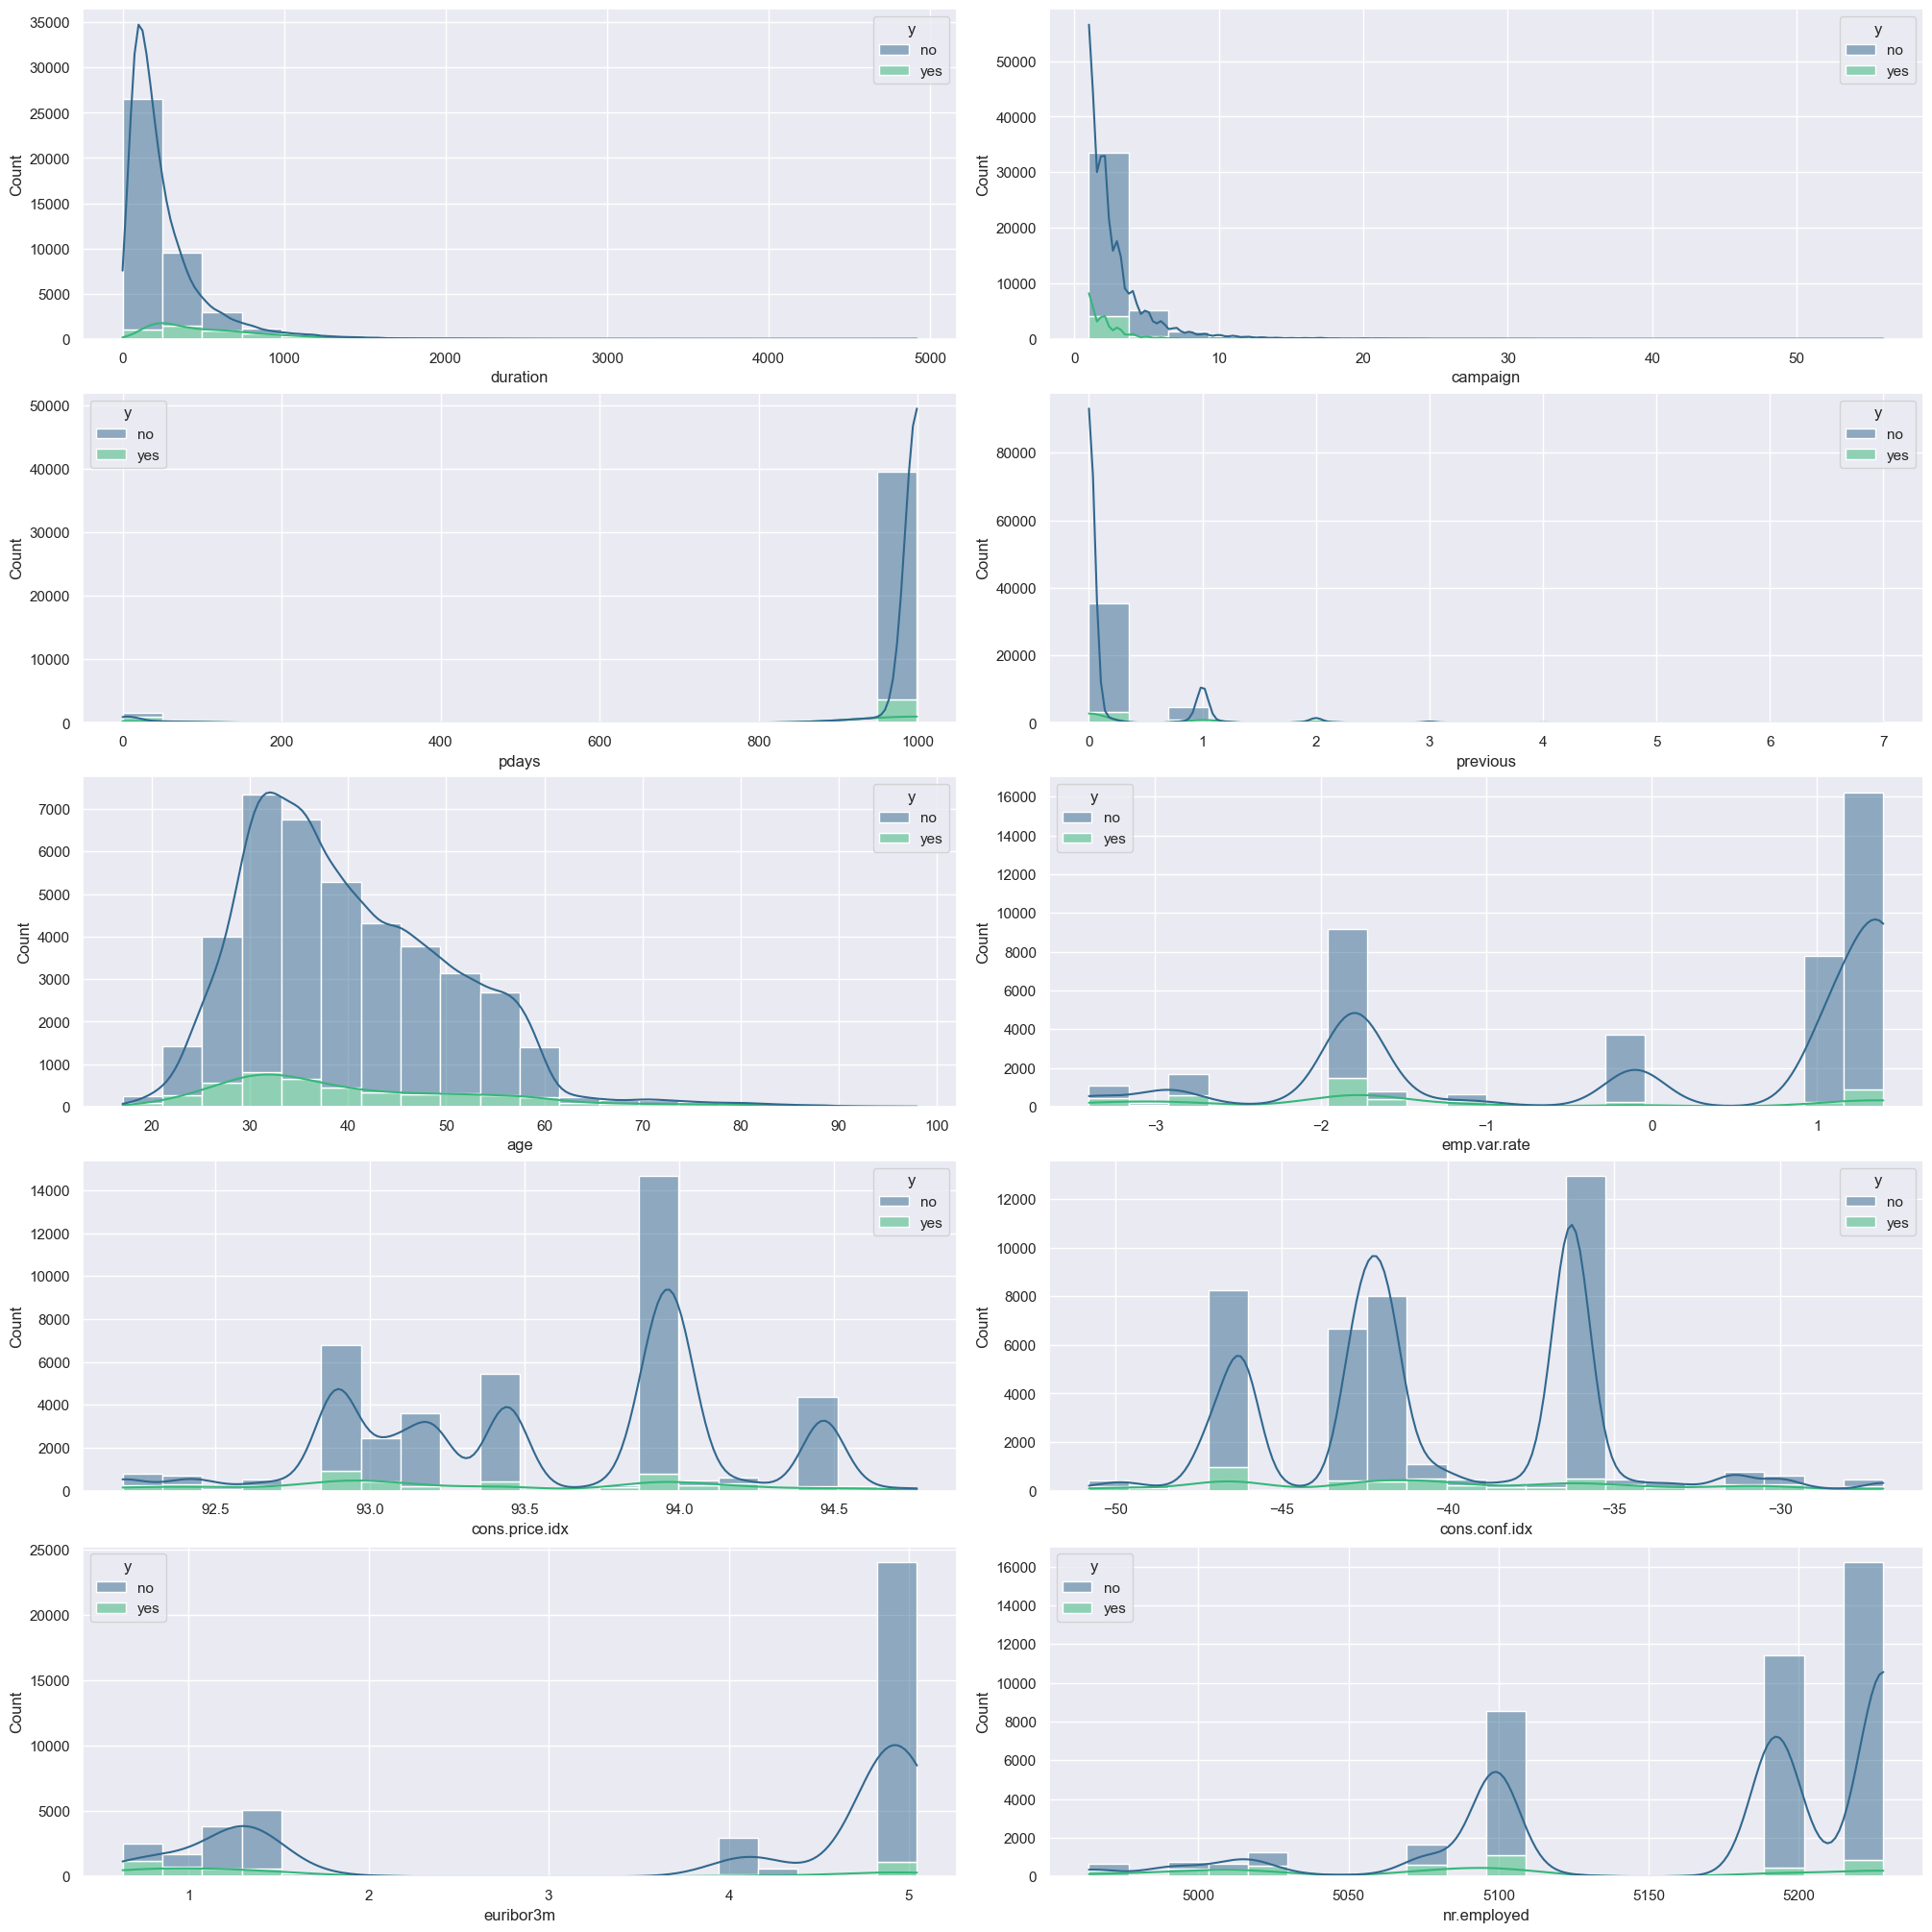

In [18]:
fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, hue='y', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))

plt.show()

Primećujemo da neke od kolona kao što su `duration`, `campaign`, `pdays` i `previous` imaju veoma lošu raspodelu vrednosti, a da kolona `age` sadrži dosta primeraka van *Gausovog zvona*. Ovo možemo i dodatno proveriti korišćenjem **boxplot** dijagrama.

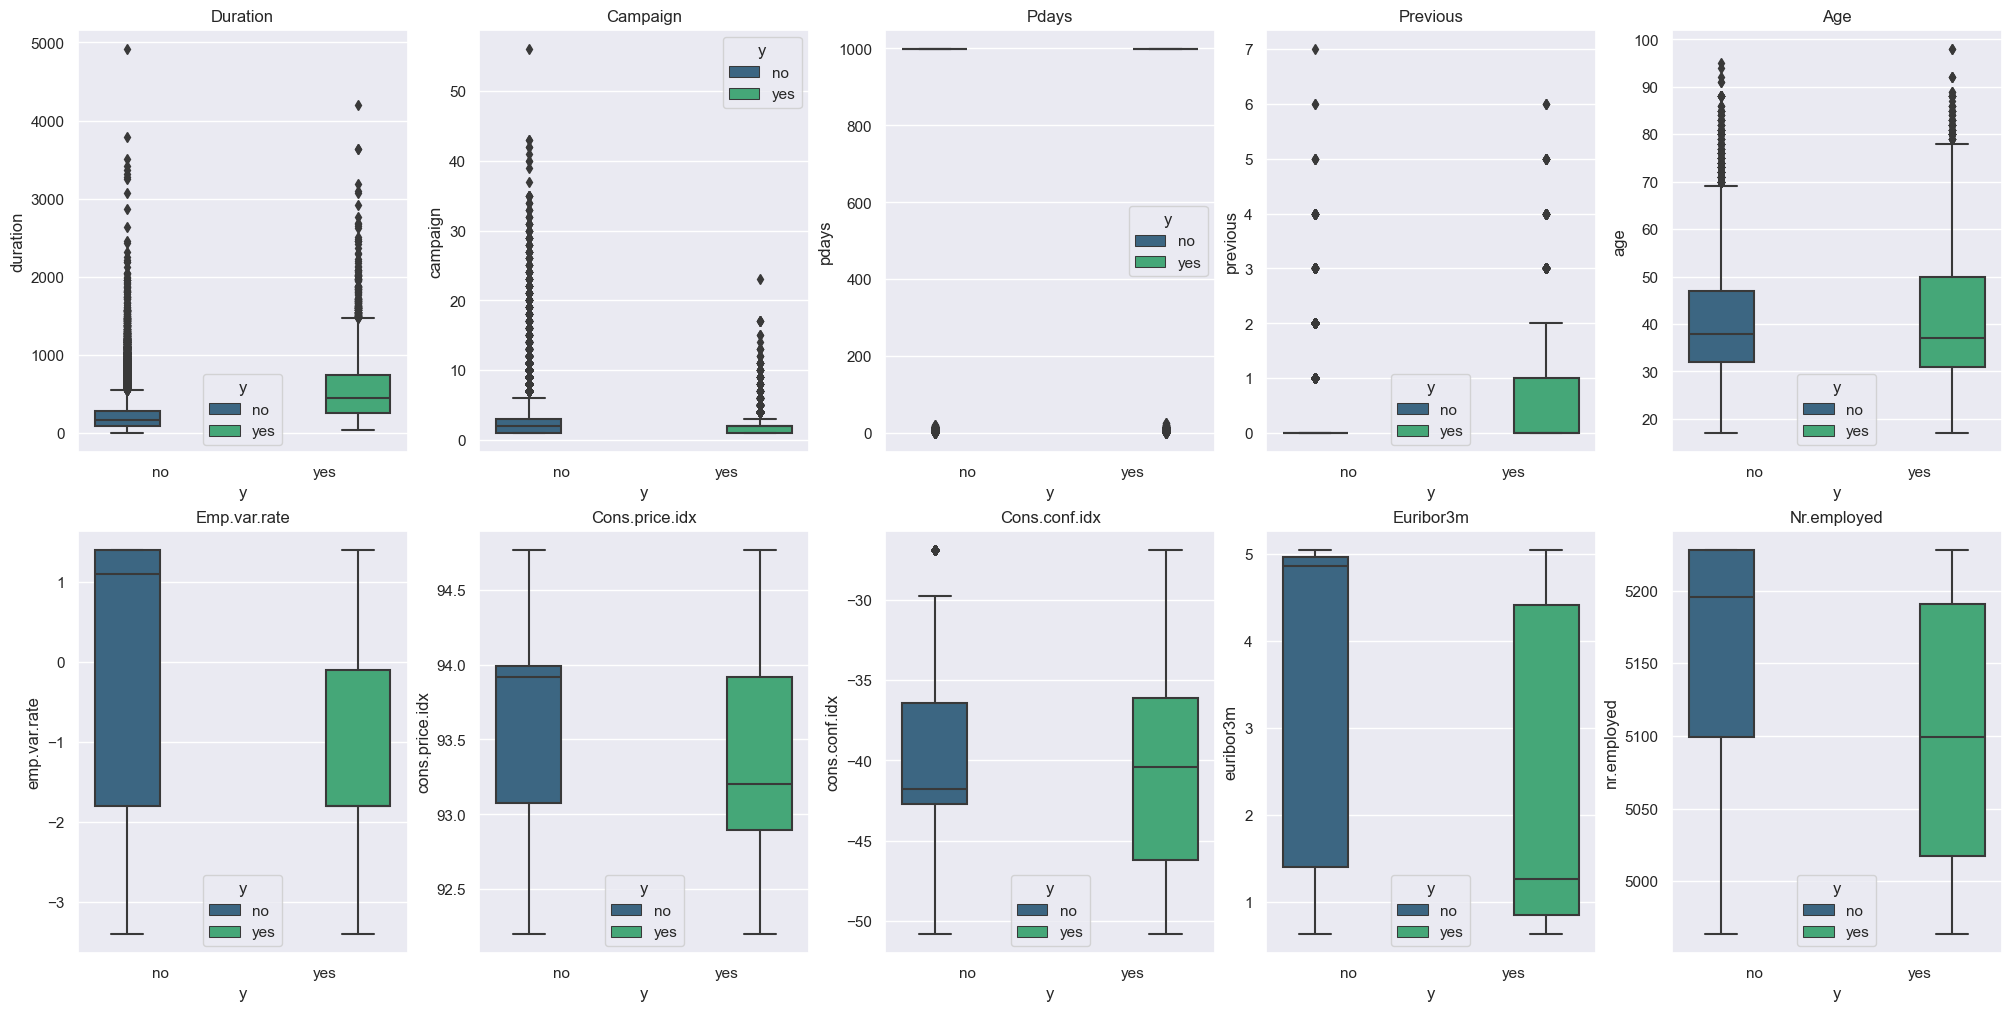

In [19]:
fig, axs = plt.subplots(2, len(numerical)//2,
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f, x='y', data=df, hue='y', ax=axs[i//5][i % 5],
                palette="viridis")
    axs[i//5][i % 5].set_title(f.capitalize())


plt.show()

Na osnovu ovakvih raspodela, možemo zaključiti da će nad određenim kolonama verovatno biti potrebno primeniti različite transformacije i tehnike preprocesiranja.

## Preprocesiranje


Za početak, možemo primetiti da kolona `default` skoro da nema nijedan primerak sa vrednošću `yes`, a gotovo svi ostali primerci (oko 80%) imaju nepoznate vrednosti. Zaključujemo da ova kolona, iz navedenih razloga, ne nosi nikakve informacije od značaja i zbog toga je možemo izbaciti.

In [20]:
df = df.drop(columns=['default'])

Obzirom da kolona `education` ima veoma mali broj primeraka sa vrednošću `illiterate`, svim ovim primercima možemo pripisati vrednost `basic.4y`, jer je osnovno četvorogodišnje obrazovanje sledeći najbliži stepen obrazovanja.

In [21]:
df.loc[df['education'] == 'illiterate', 'education'] = 'basic.4y'

Obzirom da neki od meseca u godini imaju veoma mali broj primeraka (posmatrajući kolonu `month`) u odnosu na ostale, umesto čuvanja podataka o konkretnom mesecu možemo čuvati podatke o kvartalu godine. U tu svrhu, uvodimo novu kolonu `year_quartal`, a kolonu `month` možemo izbaciti.

In [22]:
month_to_quartal = {'jan': 0, 'feb': 0, 'mar': 0,
                    'apr': 1, 'may': 1, 'jun': 1,
                    'jul': 2, 'aug': 2, 'sep': 2,
                    'oct': 3, 'nov': 3, 'dec': 3}

df['year_quartal'] = df['month'].map(month_to_quartal)
df = df.drop('month', axis=1)
print(df['year_quartal'].unique())
df.head()

[1 2 3 0]


,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,56,housemaid,married,basic.4y,no,no,telephone,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,no,no,telephone,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,yes,no,telephone,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,telephone,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,yes,telephone,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


Kolona `marital` ima veoma mali broj primeraka sa nepoznatim vrednostima, pa zbog toga možemo izvršiti jednostavno izbacivanje.

In [23]:
df = df.drop(df[df['marital'] == 'unknown'].index)

Što se ostalih kategoričkih kolona tiče, možemo izvršiti enkodiranje svih vrednosti, tako da nepoznate vrednosti kodiramo sa `np.nan` konstantom. Ovo predstavlja pripremu podataka za korišćenje `KNNImputer`-a. Mapiranje između kategoričkih i kodiranih numeričkih vrednosti za kolone `job` i `education` čuvamo u okviru odgovarajućih `LabelEncoder` objekata.

In [24]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
unknown_job = le.transform(['unknown'])
df['job'] = df['job'].replace(unknown_job, np.nan)

In [25]:
le_edu = LabelEncoder()
df['education'] = le_edu.fit_transform(df['education'])
unknown_job = le_edu.transform(['unknown'])
df['education'] = df['education'].replace(unknown_job, np.nan)

In [26]:
df['housing'] = df['housing'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['marital'] = df['marital'].map(
    {'married': 1, 'single': 0, 'divorced': 2})
df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 0})

In [27]:
df.head()

,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,56,3.0,1,0.0,0.0,0.0,0,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,7.0,1,3.0,0.0,0.0,0,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7.0,1,3.0,1.0,0.0,0,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0.0,1,1.0,0.0,0.0,0,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7.0,1,3.0,0.0,1.0,0,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


Definisaćemo tri različite tehnike za izbacivanje outlier-a u vidu funkcija:
- Z-score metod (standardna devijacija)
- IQR metod
- Isolation Forest metod

In [28]:
def remove_outliers_standard_deviation(df, features, n) -> pd.DataFrame:
    outlier_list = []

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3

        outlier_list_column = df[(
            df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_list.extend(outlier_list_column)

    return outlier_list

In [29]:
def remove_outliers_iqr(df, features) -> pd.DataFrame:

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)

        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(
            df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        outlier_list.extend(outlier_list_column)

    return outlier_list

In [30]:
def remove_outliers_isolation_forest(df, contamination='auto',
                                     columns=[]) -> pd.DataFrame:

    clf = IsolationForest(random_state=42, contamination=contamination)

    clf.fit(df[columns])

    y_pred = clf.predict(df[columns])

    outlier_list = df[y_pred == -1].index
    return outlier_list

Za transformaciju pojedinih kolona možemo iskoristiti logaritamsku transformaciju. Ovaj vid transformacije je pogodno koristiti kada imamo lošu raspodelu vrednosti po nekim kolonama, kao što je to situacija za kolone `campaign` i `duration`.

In [31]:
def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [32]:
for column in ['campaign', 'duration']:
    log_transform(df, column)

Što se tiče kolona `pdays` i `previous`, možemo ih kodirati binarno na sledeći način
- `pdays` - 0 ako prethodno nije kontaktiran, 1 ako jeste
- `previous` - 0 ako nije kontaktiran u prethodnoj kampanji, 1 ako jeste

In [33]:
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df['previous'] = df['previous'].apply(lambda x: 0 if x < 0.5 else 1)

Ponovo možemo pogledati raspodelu podataka nakon transformacija:

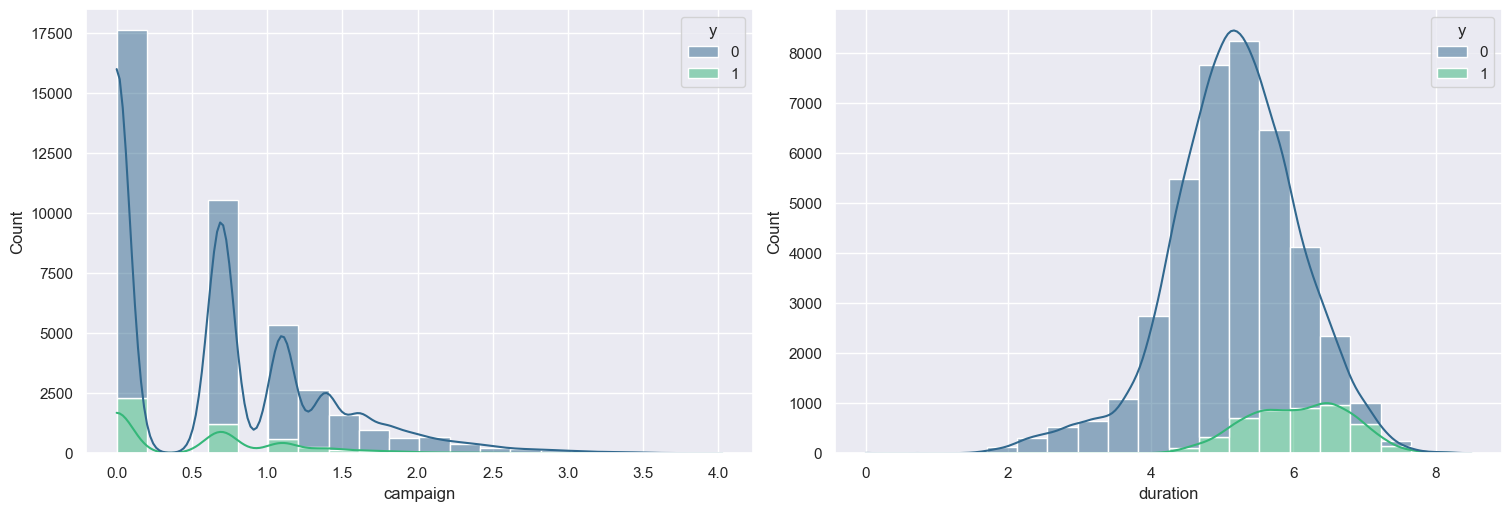

In [34]:
fig, axs = plt.subplots(1, 2,
                        figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration']):
    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i], bins=20, palette='viridis', kde=True)
plt.show()

Primećujemo da je raspodela po kolonama `duration` i `campaign` sada dosta bolja.

Nakon nekoliko pokušaja, ustanovljeno je da je IQR metoda izbacivanja outlier-a dala najbolje rezultate i to nad kolonama `campaign`, `duration` i `age`.

In [35]:
print(f"Pre izbacivanja: {df.shape}")
outliers = remove_outliers_iqr(  # proveriti
    df, ['campaign', 'duration', 'age'])
df = df.drop(outliers, axis=0).reset_index(drop=True)
print(f"Nakon izbacivanja: {df.shape}")
print(f"Outliers: {len(outliers)}")

Pre izbacivanja: (41084, 20)
Nakon izbacivanja: (39364, 20)
Outliers: 1802


Nakon transformacija i izbacivanja outliera, ponovo možemo pogledati boxplot dijagrame.

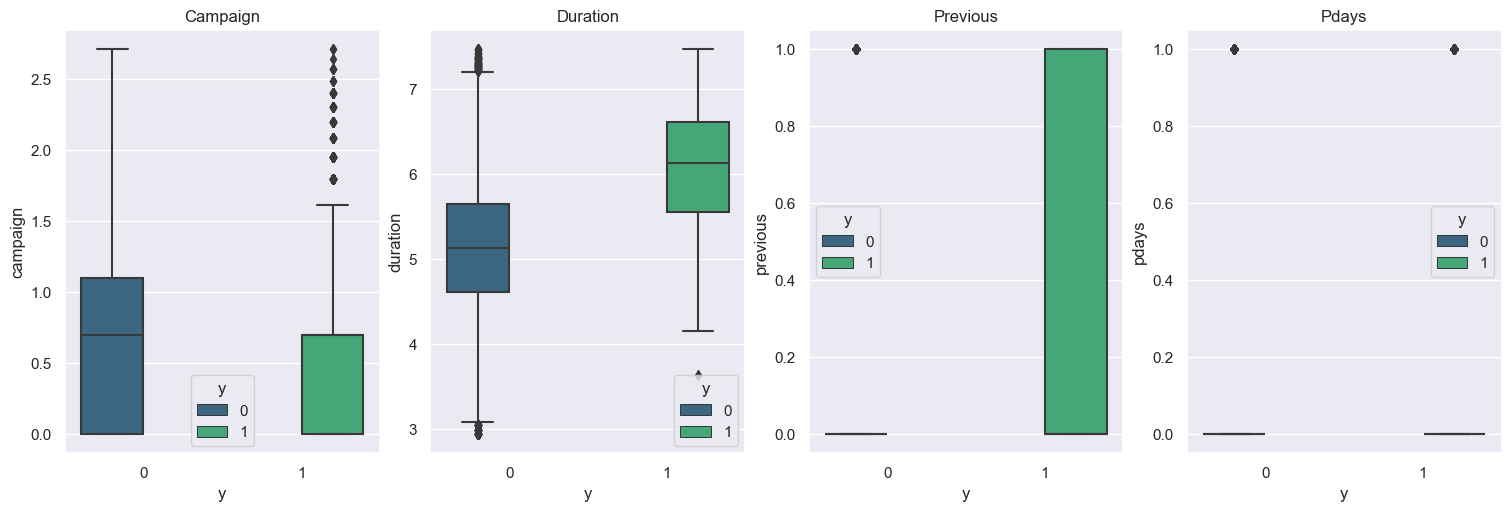

In [37]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration', 'previous', 'pdays']):
    sns.boxplot(y=f, data=df, hue='y', x='y', ax=axs[i], palette='viridis')
    axs[i].set_title(f.capitalize())
plt.show()

Nad kolonom `age` dodatno možemo primeniti i diskretizaciju. Korišćen je *quantile* metod koji određuje bin-ove tako da svaki bin sadrži jednak broj primeraka.

In [38]:
kbins_discretizer = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='quantile')
df['age'] = kbins_discretizer.fit_transform(df[['age']])
age_bins = list(pairwise(kbins_discretizer.bin_edges_[0].tolist()))
print(age_bins)  # use for labeling later
df.head()

[(17.0, 31.0), (31.0, 35.0), (35.0, 41.0), (41.0, 49.0), (49.0, 69.0)]


,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,4.0,3.0,1,0.0,0.0,0.0,0,mon,5.568345,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,4.0,7.0,1,3.0,0.0,0.0,0,mon,5.010635,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,2.0,7.0,1,3.0,1.0,0.0,0,mon,5.424950,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,2.0,0.0,1,1.0,0.0,0.0,0,mon,5.023881,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,4.0,7.0,1,3.0,0.0,1.0,0,mon,5.730100,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [39]:
df.describe()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
count,39364.000000,39060.000000,39364.000000,37740.000000,38406.000000,38406.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000
mean,2.080353,3.656912,0.826771,3.179889,0.536557,0.155158,0.636013,5.229734,0.616350,0.035616,0.134819,0.108622,93.577317,-40.504789,3.655324,5168.658144,0.110202,1.567422
std,1.391111,3.565796,0.603021,1.625939,0.498668,0.362060,0.481151,0.819459,0.645100,0.185334,0.341534,1.558100,0.573226,4.586058,1.717667,70.818489,0.313146,0.715971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.944439,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.682131,0.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000,0.000000,1.000000
50%,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,5.220356,0.693147,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000
75%,3.000000,7.000000,1.000000,5.000000,1.000000,0.000000,1.000000,5.780744,1.098612,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,2.000000
max,4.000000,10.000000,2.000000,5.000000,1.000000,1.000000,1.000000,7.465083,2.708050,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,3.000000


Nad kolonama `day_of_week` i `poutcome` primenjujemo **one-hot** kodiranje.

In [40]:
df = pd.get_dummies(
    data=df, columns=['day_of_week', 'poutcome']).astype('float64')


df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,y,year_quartal,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,5.568345,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,7.0,1.0,3.0,0.0,0.0,0.0,5.010635,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,7.0,1.0,3.0,1.0,0.0,0.0,5.424950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,1.0,1.0,0.0,0.0,0.0,5.023881,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,7.0,1.0,3.0,0.0,1.0,0.0,5.730100,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Sada su podaci spremni za primenu `KNNImputar`-a. Obzirom da vršimo imputaciju kategoričkih vrednosti, broj najbližih suseda je postavljen na 1, kako bismo izbegli decimalne vrednosti.

In [41]:
imputer = KNNImputer(n_neighbors=1, missing_values=np.nan)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,y,year_quartal,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,5.568345,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,7.0,1.0,3.0,0.0,0.0,0.0,5.010635,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,7.0,1.0,3.0,1.0,0.0,0.0,5.424950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,1.0,1.0,0.0,0.0,0.0,5.023881,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,7.0,1.0,3.0,0.0,1.0,0.0,5.730100,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Nakon primene KNN imputacije, vraćamo originalne vrednosti kolonama `job` i `education`. Ovaj korak nije neophodan, ali je jednostavnije raditi sa originalnim labelama, nego sa kodiranim vrednostima.

In [42]:
df['job'] = le.inverse_transform(df['job'].astype(int))
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [43]:
df['education'] = le_edu.inverse_transform(
    df['education'].astype(int))
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree'], dtype=object)

Ponovo proveravamo da li je proces imputacije nepoznatih vrednosti bio uspešan vizuelizacijom.

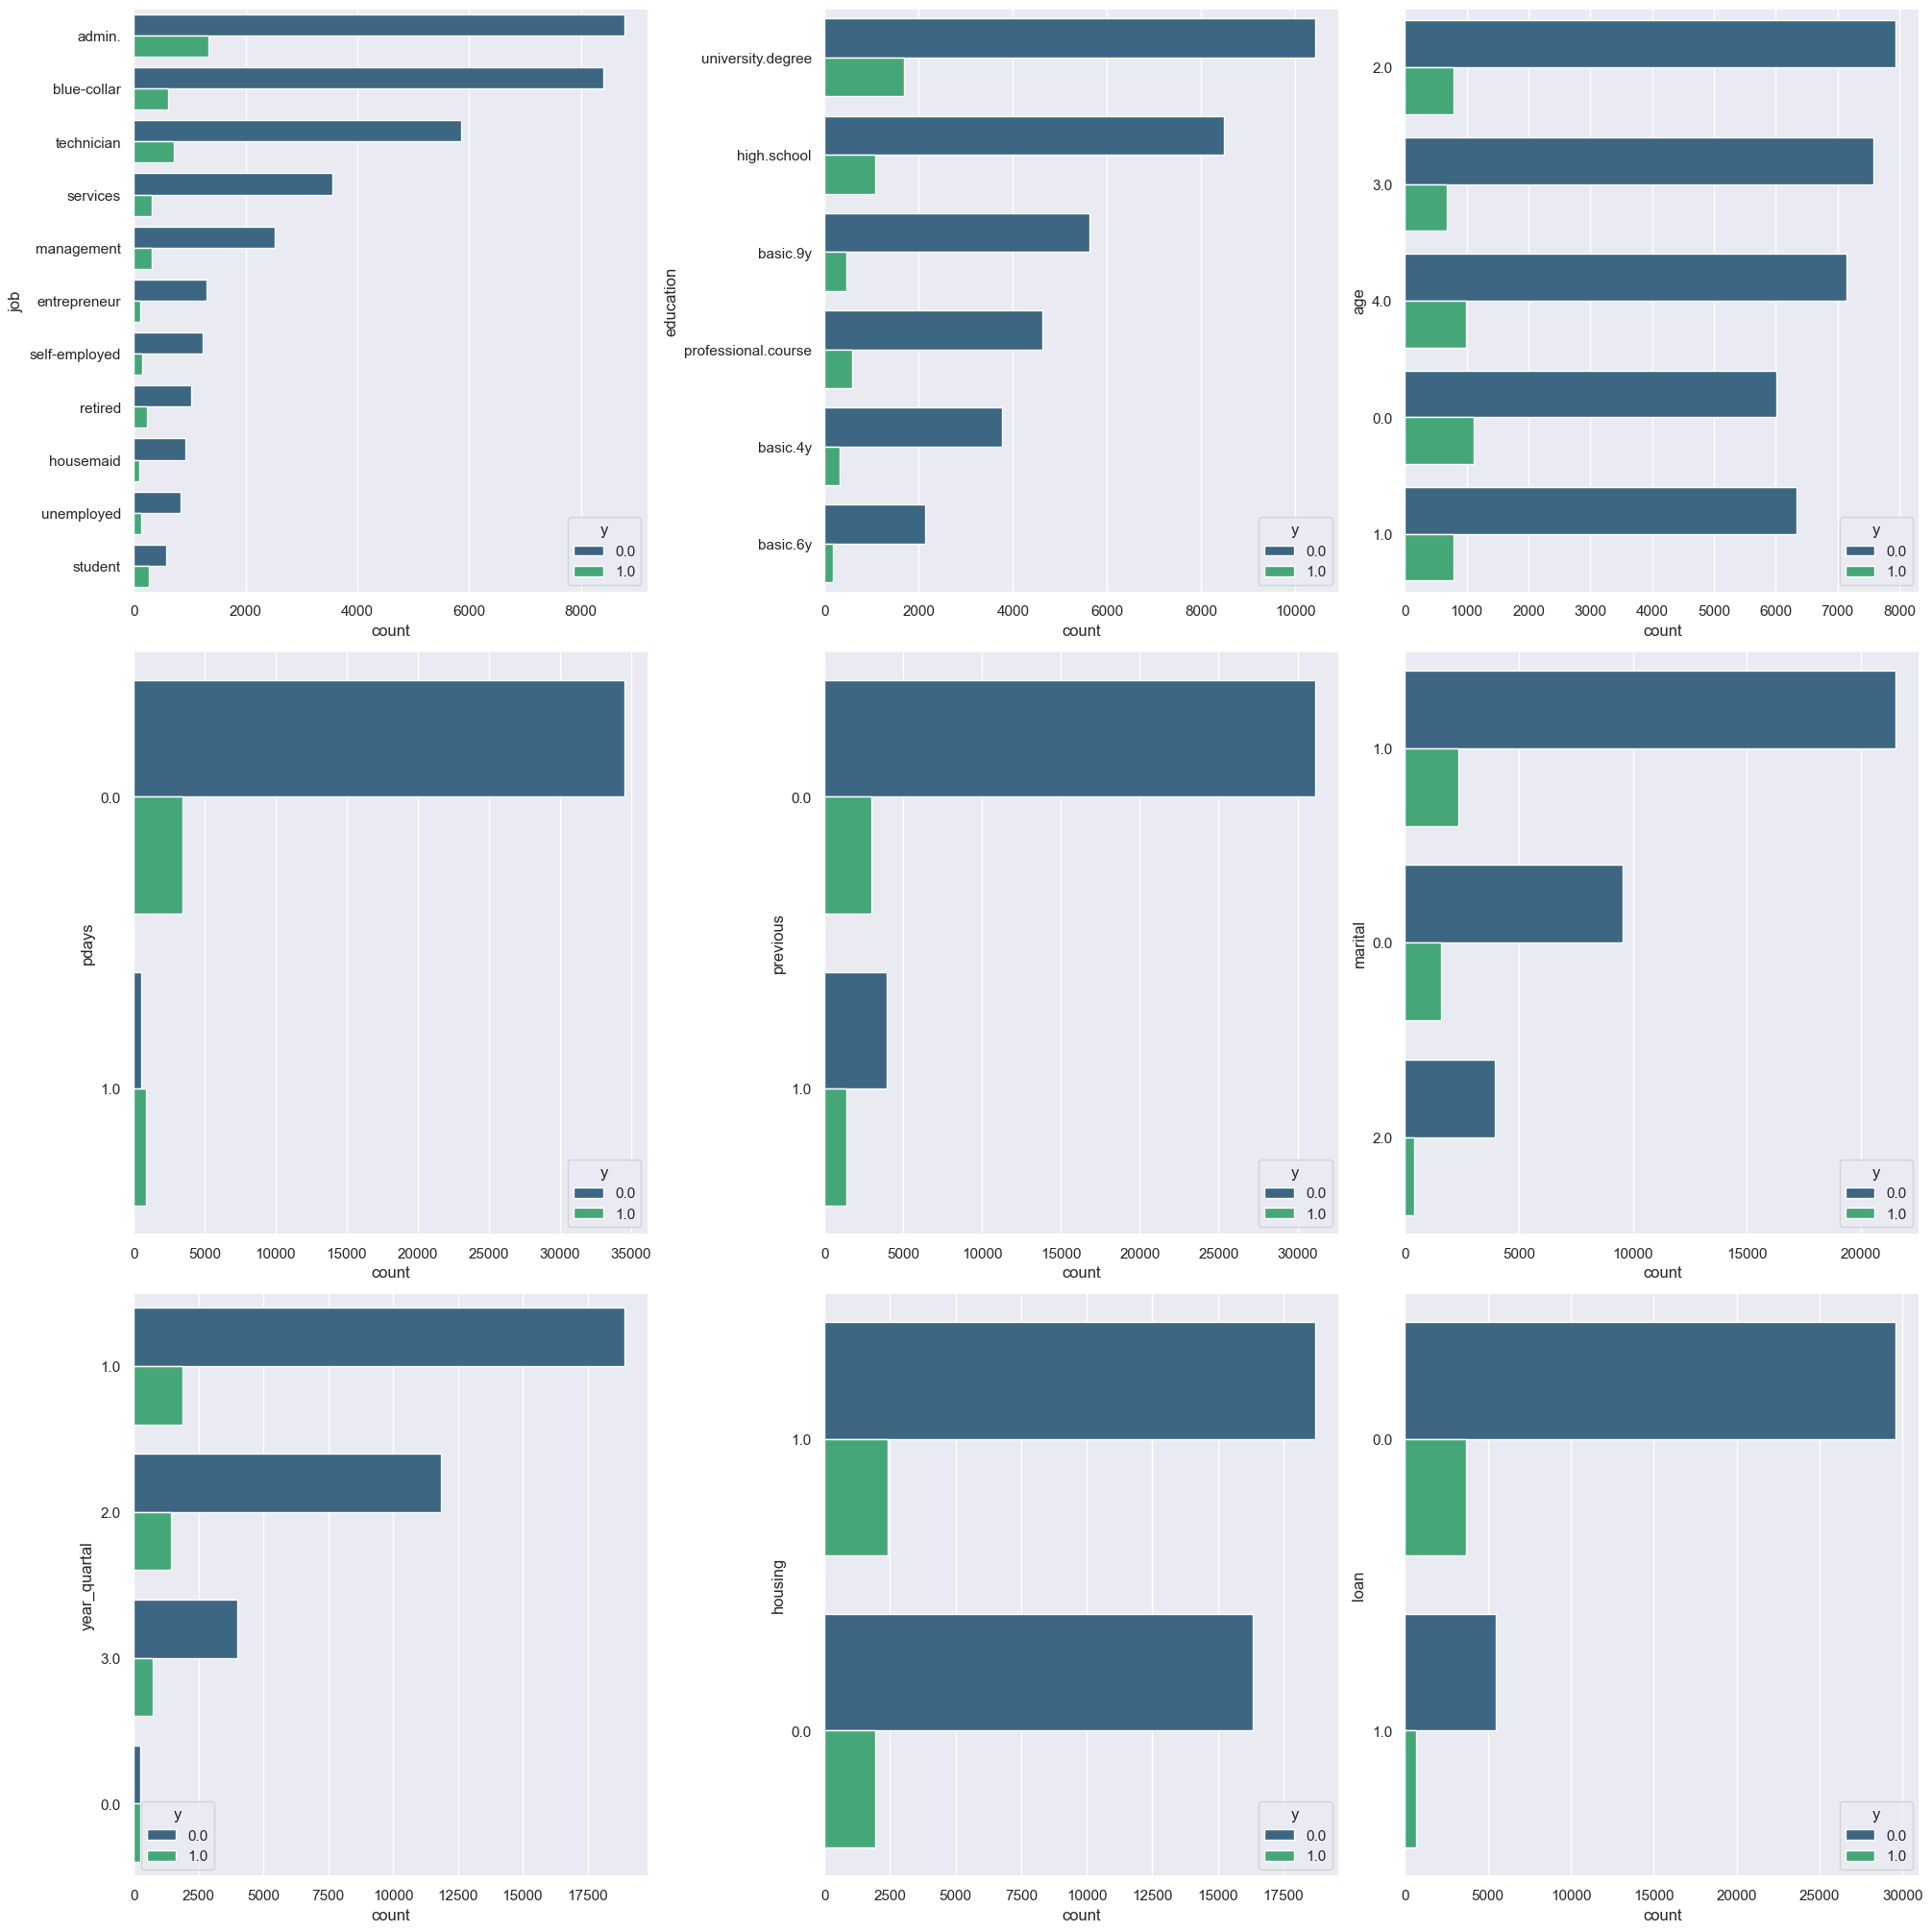

In [44]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(['job', 'education', 'age', 'pdays', 'previous', 'marital', 'year_quartal', 'housing', 'loan']):
    sns.countplot(y=f, data=df, hue='y',
                  ax=axs[i//3][i % 3],
                  order=df[f].value_counts().index, palette='viridis')

Sledeći korak koji možemo primeniti jeste da primenimo **one-hot** kodiranje nad kolonama `job`, `year_quartal` i `education`.

In [45]:
df = pd.get_dummies(
    data=df, columns=['job', 'year_quartal', 'education']).astype('float64')  # probaj sa i bez age i education

df.head()

,age,marital,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,year_quartal_0.0,year_quartal_1.0,year_quartal_2.0,year_quartal_3.0,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,4.0,1.0,0.0,0.0,0.0,5.568345,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.0,0.0,0.0,0.0,5.010635,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,5.424950,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,1.0,0.0,0.0,0.0,5.023881,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,1.0,0.0,1.0,0.0,5.730100,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Kolona `poutcome` sadrži pretežno nepoznate vrednosti i zbog toga njihova imputacija verovatno ne bi dala pogodne rezultate. Pored ovoga, ovu kolonu takođe ne bismo trebali da izbacimo jer sadrži potencijalno bitne informacije (da li je klijen pristao na uslove u prethodnoj kampanji). Zbog ovoga je odlučeno da se izvrši **one-hot** kodiranje, a da se nakon kodiranja kolona `poutcome_nonexistant` samo izbaci.

In [46]:
df = df.drop(columns=['poutcome_nonexistent'])

Kako bismo proverili korelaciju između pojedinačnih kolona, možemo analizirati matricu korelacije.

<Axes: >

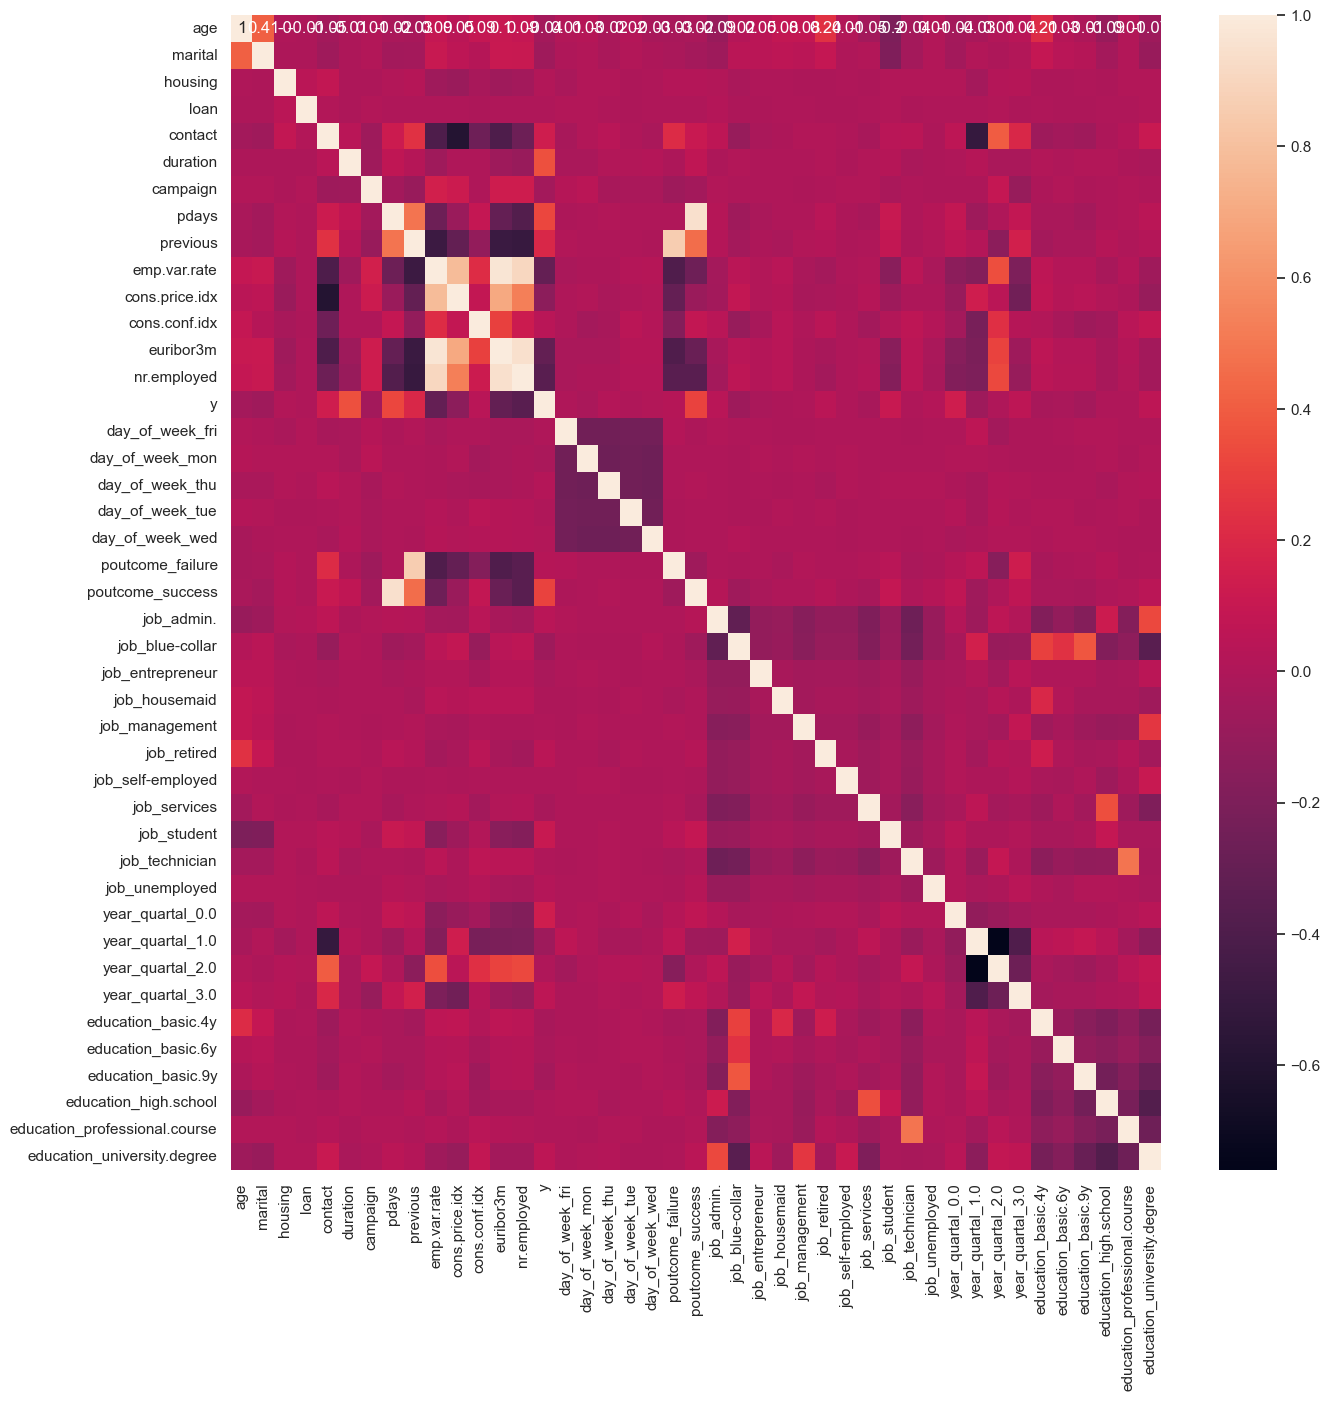

In [47]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=corr, annot=True, ax=ax)

Na osnovu korelacione matrice možemo primetiti da određene kolone imaju korelaciju skoro 1.0, što ukazuje na njihovu međusobnu zavisnost. Neke od njih su: `emp.var.rate`,     `nr.employed` i `eurobor3m`. Zbog toga moguće je otkloniti navedene kolone iz dataset-a i ostaviti samo jednu.

In [48]:
df = df.drop(columns=['emp.var.rate', 'nr.employed'])

In [49]:
df.dtypes

age                              float64
marital                          float64
housing                          float64
loan                             float64
contact                          float64
duration                         float64
campaign                         float64
pdays                            float64
previous                         float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
y                                float64
day_of_week_fri                  float64
day_of_week_mon                  float64
day_of_week_thu                  float64
day_of_week_tue                  float64
day_of_week_wed                  float64
poutcome_failure                 float64
poutcome_success                 float64
job_admin.                       float64
job_blue-collar                  float64
job_entrepreneur                 float64
job_housemaid                    float64
job_management  

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39364 entries, 0 to 39363
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39364 non-null  float64
 1   marital                        39364 non-null  float64
 2   housing                        39364 non-null  float64
 3   loan                           39364 non-null  float64
 4   contact                        39364 non-null  float64
 5   duration                       39364 non-null  float64
 6   campaign                       39364 non-null  float64
 7   pdays                          39364 non-null  float64
 8   previous                       39364 non-null  float64
 9   cons.price.idx                 39364 non-null  float64
 10  cons.conf.idx                  39364 non-null  float64
 11  euribor3m                      39364 non-null  float64
 12  y                              39364 non-null 

Nad odgovarajućim kolonama koje sadrže kontinualne numeričke vrednosti, možemo primeniti skaliranje - u našem slučaju izabrali smo standardizaciju.

In [52]:
scaler = StandardScaler()
cols_to_scale = ['euribor3m', 'duration', 'age',
                 'campaign', 'cons.price.idx',	'cons.conf.idx']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,age,marital,housing,loan,contact,duration,campaign,pdays,previous,cons.price.idx,...,year_quartal_0.0,year_quartal_1.0,year_quartal_2.0,year_quartal_3.0,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,1.379956,1.0,0.0,0.0,0.0,0.413217,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.379956,1.0,0.0,0.0,0.0,-0.267374,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.057762,1.0,1.0,0.0,0.0,0.238228,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.057762,1.0,0.0,0.0,0.0,-0.251210,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.379956,1.0,0.0,1.0,0.0,0.610612,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

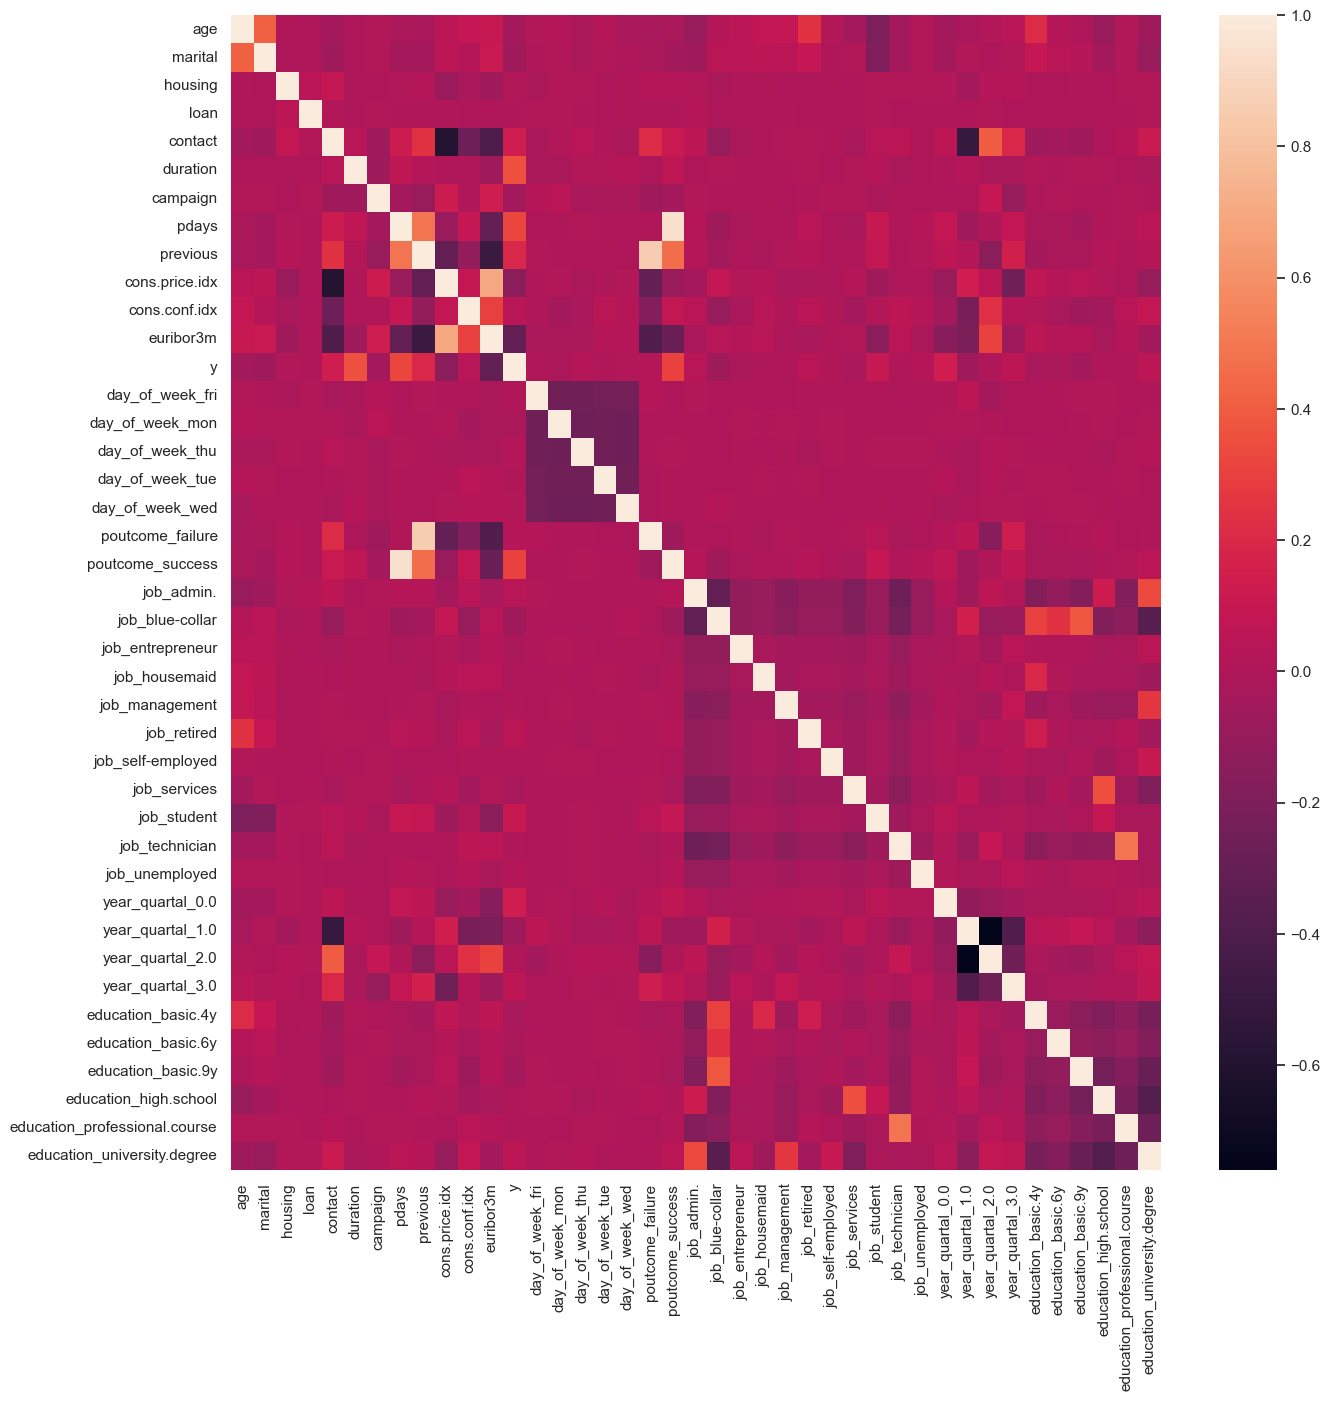

In [53]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=corr, annot=False, ax=ax)

## Isprobavanje modela


Nakon obavljenog preprocesiranja, možemo preći na isprobavanje različitih modela, njihovu evaluaciju i selekciju. Prvi korak je podela dataseta na train i test set. Kako bismo dobili što vernije rezultate, train-test split radimo samo jednom, na početku, i sve modele treniramo i testiramo korišćenjem istih skupova.

In [60]:
X = df.drop('y', axis=1)
y = df['y']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm",  "CV-AUC", "CV-Accuracy", "CV-F1",
             "AUC", "Accuracy", "F1",])
results.set_index('Algorithm', inplace=True)

Na početku, smo ustanovili da je ovaj dataset veoma loše balansiran. Zbog toga, možemo odmah pripremiti resample-ovan dataset korišćenjem tehnike balansiranja SMOTE+ENN (SMOTE - vrši oversampling klase sa manjim brojem primeraka, ENN - vrši undersampling klase sa većim brojem primeraka).

<Axes: xlabel='y', ylabel='count'>

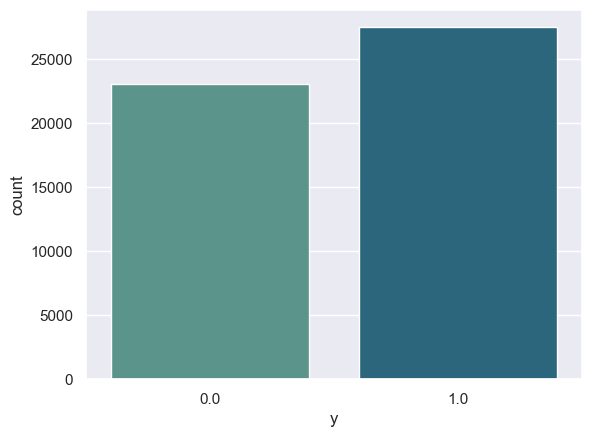

In [62]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled, palette=sns.color_palette("crest", 2))

In [63]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap_base = 'inferno'
vmin, vmax = 0.4, 0.9
cmap = truncate_colormap(cmap_base, vmin, vmax)

Kako bismo olakšali proces testiranja modela i corss-validation, možemo definisati odgovarajuće funkcije koje ovo obavljaju i čuvaju rezultate u tabeli (pandas DataFraem-u).

In [64]:
def cross_validate_models(classifiers, X, y, cv=5, results=results):
    for name in classifiers:
        print(f"{name}... ", end="")
        classifier = classifiers[name]
        scoring_metrics = ['accuracy', 'f1', 'roc_auc']
        cv_results = cross_validate(
            classifier, X, y, cv=cv, scoring=scoring_metrics)
        acc = cv_results['test_accuracy'].mean()
        f1 = cv_results['test_f1'].mean()
        auc = cv_results['test_roc_auc'].mean()
        results.loc[name, 'CV-F1'] = f1
        results.loc[name, 'CV-AUC'] = auc
        results.loc[name, 'CV-Accuracy'] = acc

In [65]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):
    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        results.loc[name, "F1"] = f1
        results.loc[name, "AUC"] = roc_auc
        results.loc[name, "Accuracy"] = acc

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False, cmap=cmap)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

Za početak, isprobavamo nekoliko različitih modela nad nebalansiranim datasetom.

Random Forest... AdaBoost... Bagging... Ridge... SVC... MLP... XGBoost... Random Forest:DONE; AdaBoost:DONE; Bagging:DONE; Ridge:DONE; SVC:DONE; MLP:DONE; XGBoost:DONE; 

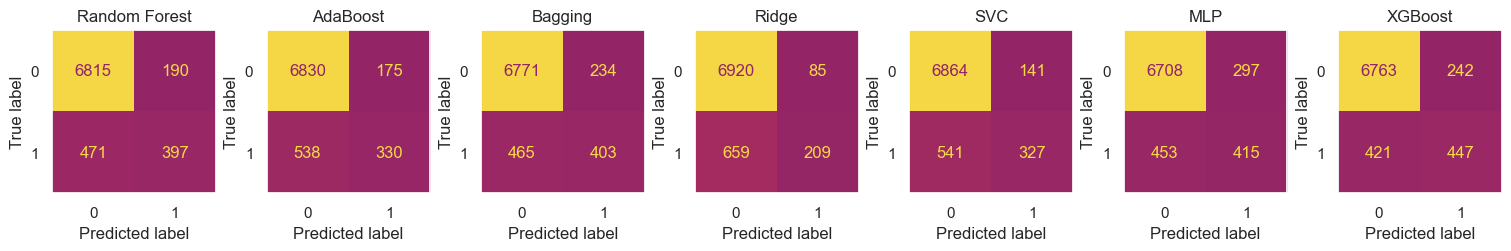

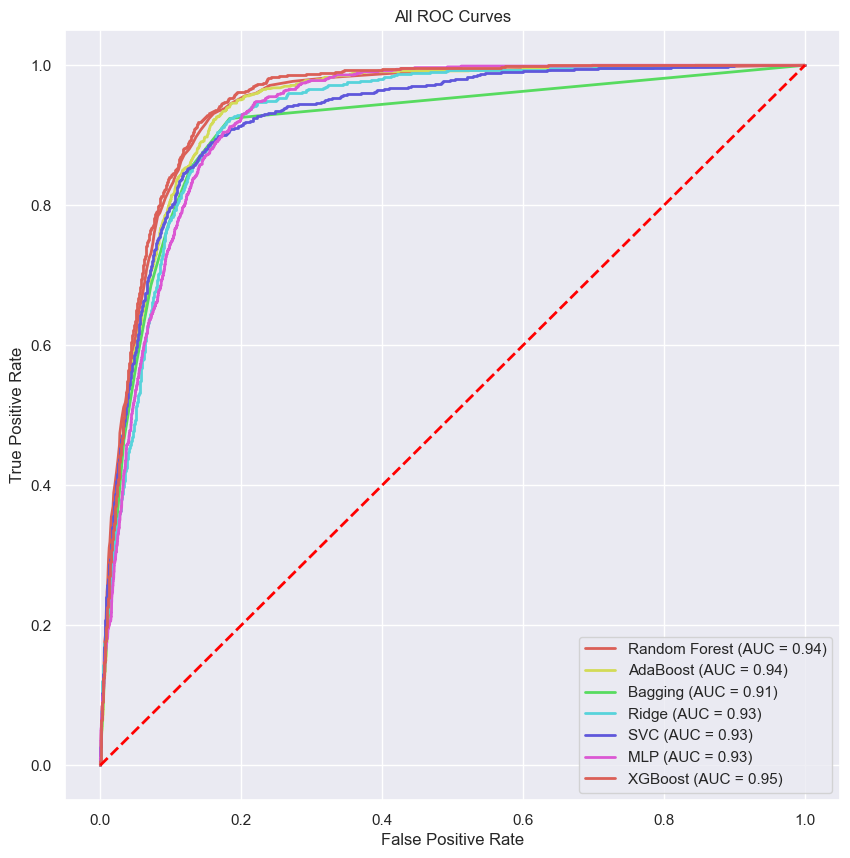

In [66]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Ridge': RidgeClassifier(),
    'SVC': SVC(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

classifiers_cv = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Ridge': RidgeClassifier(),
    'SVC': SVC(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

cross_validate_models(classifiers_cv, X_train,
                      y_train, results=results, cv=3)
results = test_models(classifiers, X_train, X_test, y_train, y_test, results)

Jednostavnom inspekcijom matrica konfuzije, primećujemo da svi modeli veoma loše vrše predikciju pozitivnog ishoda. Ovo je posledica treniranja modela nad nebalansiranim dataset-om. Zbog toga ćemo u daljim razmatranjima koristiti isključivo balansirani dataset.

Random Forest (balanced)... AdaBoost (balanced)... Bagging (balanced)... Ridge (balanced)... SVC (balanced)... Neural Network (balanced)... XGBoost (balanced)... 
Random Forest (balanced):DONE; AdaBoost (balanced):DONE; Bagging (balanced):DONE; Ridge (balanced):DONE; SVC (balanced):DONE; Neural Network (balanced):DONE; XGBoost (balanced):DONE; 

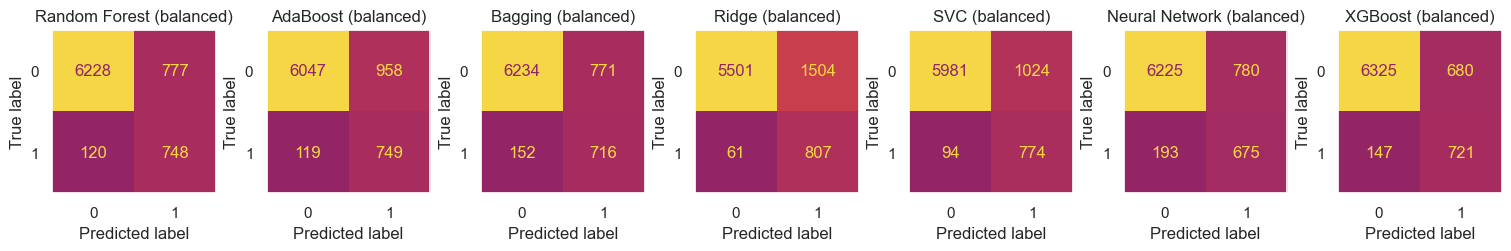

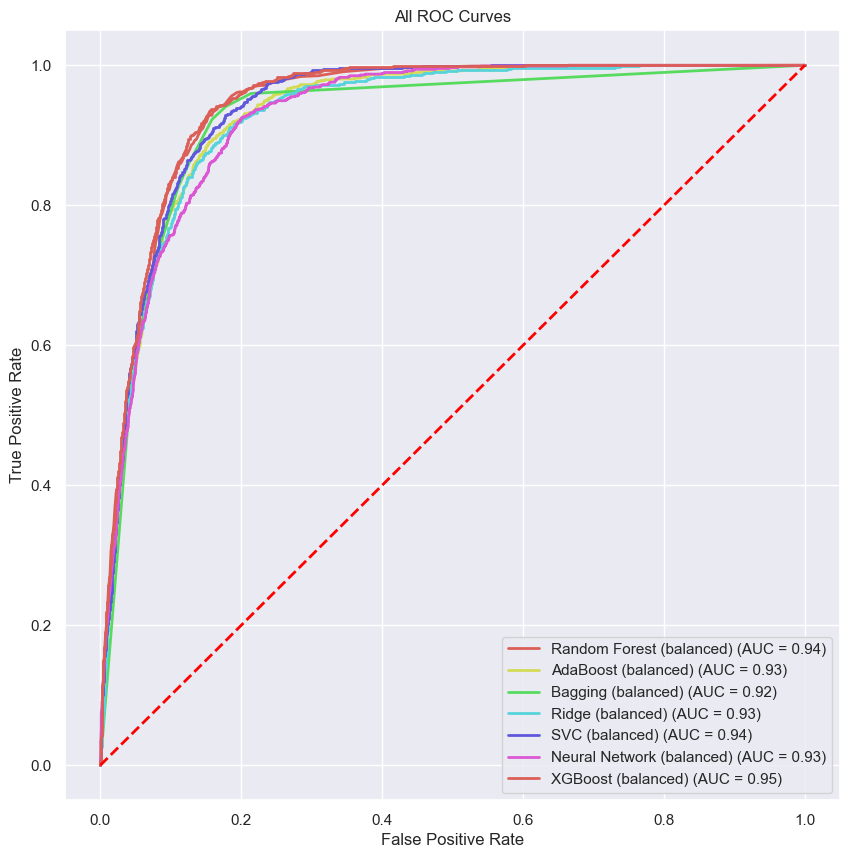

In [67]:
classifiers_balanced = {
    'Random Forest (balanced)': RandomForestClassifier(),
    'AdaBoost (balanced)': AdaBoostClassifier(),
    'Bagging (balanced)': BaggingClassifier(),
    'Ridge (balanced)': RidgeClassifier(),
    'SVC (balanced)': SVC(),
    'Neural Network (balanced)': MLPClassifier(),
    'XGBoost (balanced)': XGBClassifier(),
}
classifiers_balanced_cv = {
    'Random Forest (balanced)': make_pipeline(SMOTEENN(random_state=42), RandomForestClassifier()),
    'AdaBoost (balanced)': make_pipeline(SMOTEENN(random_state=42), AdaBoostClassifier()),
    'Bagging (balanced)': make_pipeline(SMOTEENN(random_state=42), BaggingClassifier()),
    'Ridge (balanced)': make_pipeline(SMOTEENN(random_state=42), RidgeClassifier()),
    'SVC (balanced)': make_pipeline(SMOTEENN(random_state=42), SVC()),
    'Neural Network (balanced)': make_pipeline(SMOTEENN(random_state=42), MLPClassifier()),
    'XGBoost (balanced)': make_pipeline(SMOTEENN(random_state=42), XGBClassifier()),
}

cross_validate_models(classifiers_balanced_cv, X_train,
                      y_train, results=results)
print()

results = test_models(classifiers_balanced, X_resampled,
                      X_test, y_resampled, y_test, results)

In [70]:
results.sort_values(by='CV-F1', ascending=False)

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
XGBoost (balanced),0.944638,0.890127,0.62445,0.945056,0.894957,0.635522
Random Forest (balanced),0.940116,0.879775,0.610268,0.941187,0.886066,0.625157
Bagging (balanced),0.927721,0.878442,0.603436,0.923399,0.882764,0.608068
Neural Network (balanced),0.926489,0.868471,0.57502,0.927795,0.876413,0.581145
AdaBoost (balanced),0.931799,0.856213,0.57324,0.931185,0.863203,0.581748
SVC (balanced),0.937532,0.848941,0.570186,0.939416,0.857996,0.580645
XGBoost,0.943717,0.912419,0.568525,0.945553,0.915788,0.574181
Random Forest,0.940594,0.913594,0.540736,0.940599,0.916042,0.545704
Bagging,0.915969,0.910324,0.536509,0.909407,0.911216,0.535548


## Optimizacija Hiperparametara


In [ ]:
param_random_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200 , 300 , 400 , 500 , 600, 700],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}

xgb_classifier = XGBClassifier()

randomized_search_xgb = RandomizedSearchCV(
    estimator=xgb_classifier, param_distributions=param_random_grid,
    n_iter=10, cv=5, random_state=42)

randomized_search_xgb.fit(X_resampled, y_resampled)

print(randomized_search_xgb.best_params_)
print(randomized_search_xgb.best_score_)

{'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1}
0.9721288792251433


Output je:
```{'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1}```. Sada formiramo grid za grid search:

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [5, 6, 7],
    'n_estimators': [50],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier, param_grid=param_grid,
    cv=5, n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_resampled, y_resampled)

print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.9}
0.997714914959916


Ideja iz: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [61]:
rfc_random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
}

rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_random_grid,
                                n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
rfc_random.fit(X_resampled, y_resampled)
print(rfc_random.best_params_)
print(rfc_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
0.985017126413817


Output je:
```{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}```. Sada formiramo grid za grid search:

In [62]:
rfc_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [1, 2],
    'n_estimators': [300, 400, 500]
}

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_grid,
                        cv=5, verbose=2, n_jobs=-1)
rfc_grid.fit(X_resampled, y_resampled)
print(rfc_grid.best_params_)
print(rfc_grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.9848986878289979


Random Forest (optimized):DONE; XGBoost (optimized):DONE; 

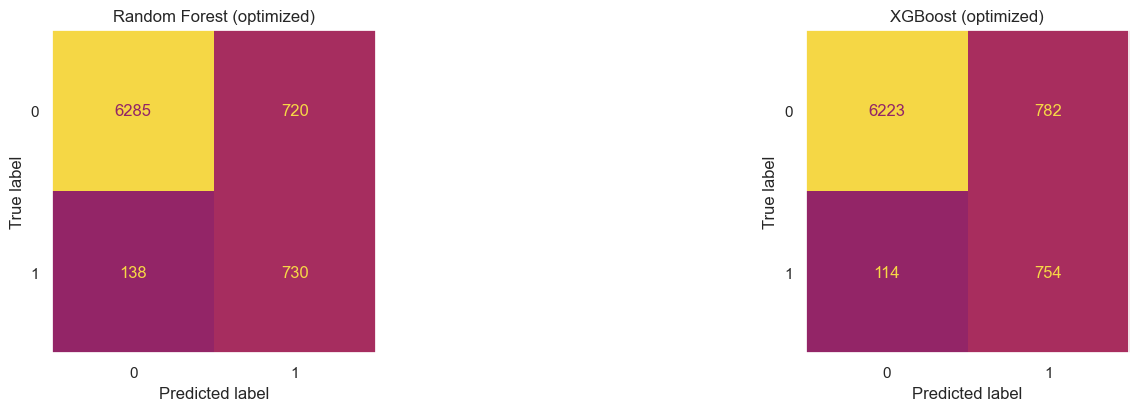

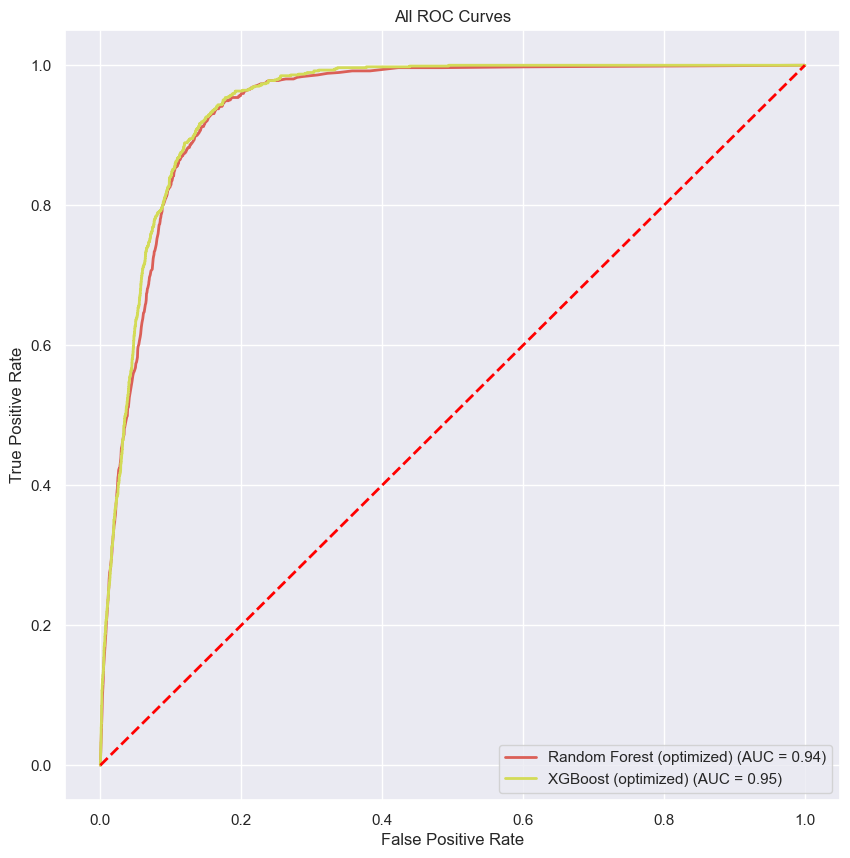

In [87]:
hp_optimized_models = {
    'Random Forest (optimized)': RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300),
    'XGBoost (optimized)': XGBClassifier(learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.9),
}
results = test_models(hp_optimized_models, X_resampled,
                      X_test, y_resampled, y_test, results)

In [83]:
hp_optimized_models_cv = {
    'Random Forest (optimized)': make_pipeline(SMOTEENN(random_state=42), RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
    'XGBoost (optimized)': make_pipeline(SMOTEENN(random_state=42), XGBClassifier(learning_rate=0.15, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.9)),
}
cross_validate_models(hp_optimized_models_cv, X_train,
                      y_train, results=results)

Random Forest (optimized)... XGBoost (optimized)... 

In [88]:
results.sort_values(by='CV-AUC', ascending=False)

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
XGBoost (optimized),0.945564,0.88076,0.618766,0.945918,0.886193,0.627288
XGBoost (balanced),0.944638,0.890127,0.62445,0.945056,0.894957,0.635522
Random Forest (optimized),0.940129,0.883522,0.612231,0.941152,0.89102,0.629853
Random Forest (balanced),0.940116,0.879775,0.610268,0.941187,0.886066,0.625157
SVC (balanced),0.937532,0.848941,0.570186,0.939416,0.857996,0.580645
AdaBoost (balanced),0.931799,0.856213,0.57324,0.931185,0.863203,0.581748
Bagging (balanced),0.927721,0.878442,0.603436,0.923399,0.882764,0.608068
Neural Network (balanced),0.926489,0.868471,0.57502,0.927795,0.876413,0.581145
Ridge (balanced),0.92647,0.790924,0.49721,0.928836,0.801219,0.507707


### Feature Importance

In [89]:
feat_importances_df = pd.DataFrame(
    columns=['Random Forest (optimized)', 'XGBoost (optimized)', 'Lasso'])

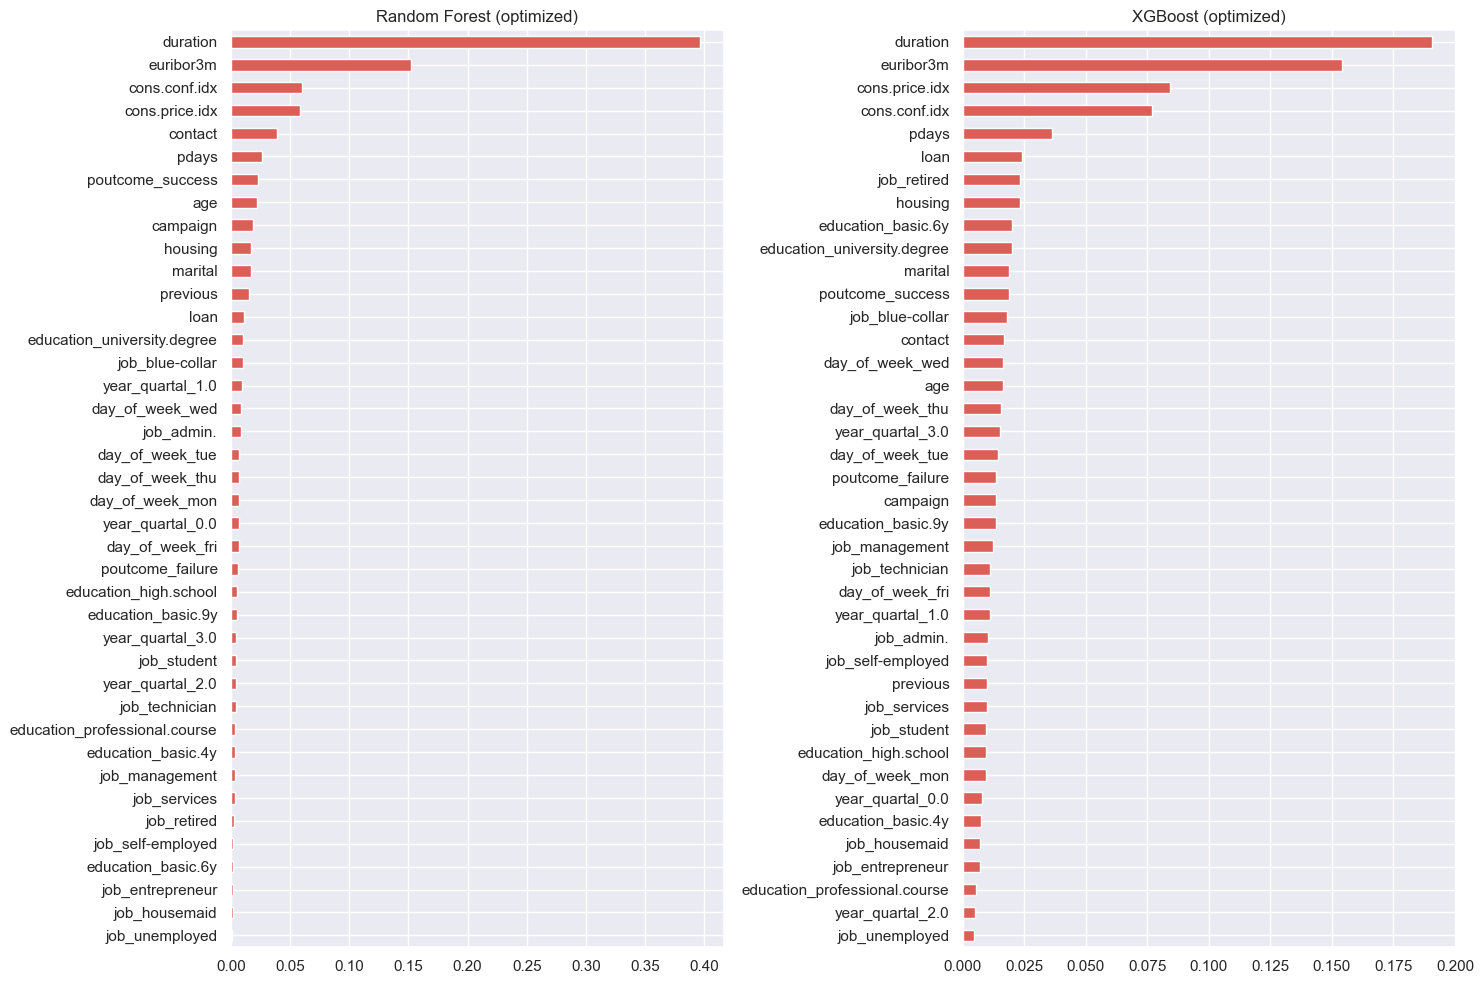

In [90]:
plt.figure(figsize=(15, 10))
for i, name in enumerate(hp_optimized_models):
    classifier = hp_optimized_models[name]
    feat_importances = pd.Series(
        classifier.feature_importances_, index=X.columns)
    plt.subplot(1, len(hp_optimized_models), i+1)
    feat_importances_df[name] = feat_importances
    feat_importances.sort_values().plot(kind='barh')
    plt.title(name)
plt.tight_layout()
plt.show()

#### Lasso Regression

In [91]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_resampled, y_resampled)

lasso1_coef = np.abs(lasso1.coef_)
pd_lasso1 = pd.DataFrame(lasso1_coef, index=X.columns, columns=['coef'])
pd_lasso1.sort_values(by='coef', ascending=False, inplace=True)
feat_importances_df['Lasso'] = pd_lasso1['coef']

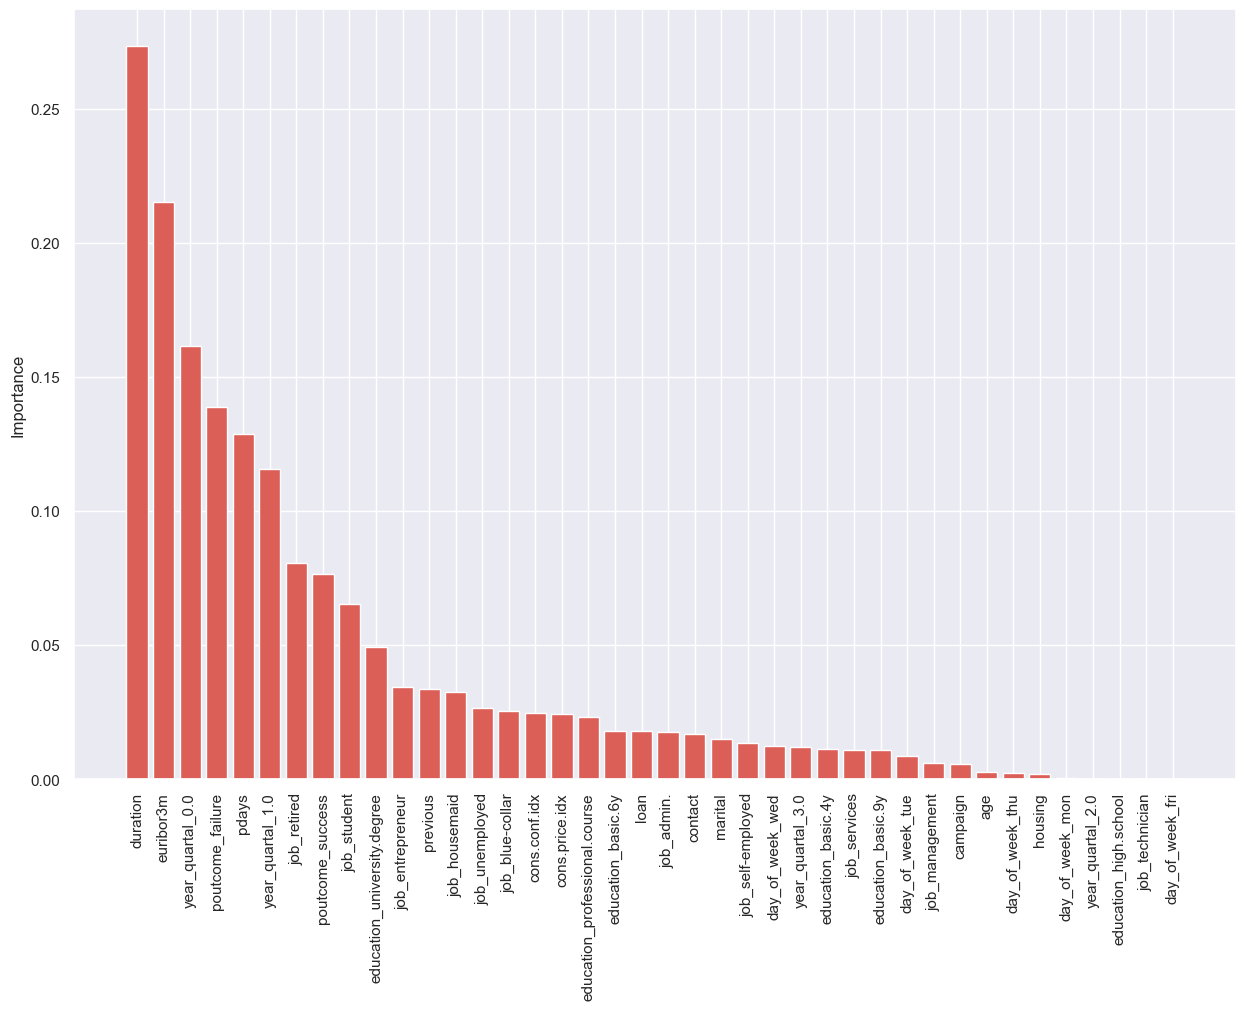

In [92]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.bar(pd_lasso1.index, pd_lasso1['coef'])
plt.ylabel("Importance")
plt.show()

In [93]:
feat_importances_df.sort_values(
    by='Lasso', ascending=False)

,Random Forest (optimized),XGBoost (optimized),Lasso
duration,0.396746,0.190809,2.733599e-01
euribor3m,0.152022,0.153896,2.150618e-01
year_quartal_0.0,0.006774,0.007692,1.616236e-01
poutcome_failure,0.006313,0.013441,1.385877e-01
pdays,0.026324,0.036269,1.287367e-01
year_quartal_1.0,0.009645,0.010892,1.157377e-01
job_retired,0.002812,0.023264,8.064936e-02
poutcome_success,0.022837,0.018792,7.630695e-02
job_student,0.004580,0.009580,6.541836e-02
education_university.degree,0.010709,0.019812,4.939331e-02


In [98]:
importance_threshold = 0.024
unimportant_features = feat_importances_df[
    (feat_importances_df['Random Forest (optimized)'] < importance_threshold) &
    (feat_importances_df['XGBoost (optimized)'] < importance_threshold) &
    (feat_importances_df['Lasso'] < importance_threshold)]\
    .sort_values(by='Lasso', ascending=False)
display(unimportant_features)
unimportant_features.count()

,Random Forest (optimized),XGBoost (optimized),Lasso
education_professional.course,0.003775,0.005223,2.334236e-02
education_basic.6y,0.001994,0.020020,1.793258e-02
job_admin.,0.008490,0.010358,1.758614e-02
marital,0.016899,0.018892,1.480186e-02
job_self-employed,0.002196,0.009824,1.346613e-02
day_of_week_wed,0.008550,0.016467,1.250233e-02
year_quartal_3.0,0.004773,0.015208,1.214017e-02
education_basic.4y,0.003744,0.007279,1.120937e-02
job_services,0.003618,0.009749,1.084235e-02
education_basic.9y,0.005304,0.013333,1.079492e-02


Random Forest (optimized)    21
XGBoost (optimized)          21
Lasso                        21
dtype: int64

In [99]:
X_resampled_fi = X_resampled.drop(unimportant_features.index, axis=1)
X_test_fi = X_test.drop(unimportant_features.index, axis=1)

Random Forest (optimized + FI):DONE; XGBoost (optimized + FI):DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
XGBoost (optimized + FI),NaN,NaN,NaN,0.945982,0.874508,0.612245
XGBoost (optimized),0.945564,0.88076,0.618766,0.945918,0.886193,0.627288
XGBoost (balanced),0.944638,0.890127,0.62445,0.945056,0.894957,0.635522
Random Forest (balanced),0.940116,0.879775,0.610268,0.941187,0.886066,0.625157
Random Forest (optimized),0.940129,0.883522,0.612231,0.941152,0.89102,0.629853
SVC (balanced),0.937532,0.848941,0.570186,0.939416,0.857996,0.580645
Random Forest (optimized + FI),NaN,NaN,NaN,0.931963,0.885939,0.618846
AdaBoost (balanced),0.931799,0.856213,0.57324,0.931185,0.863203,0.581748
Ridge (balanced),0.92647,0.790924,0.49721,0.928836,0.801219,0.507707


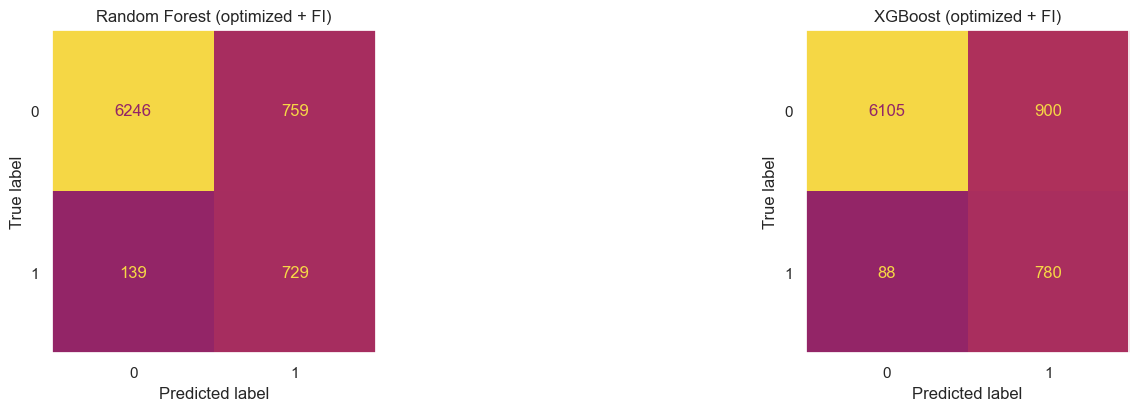

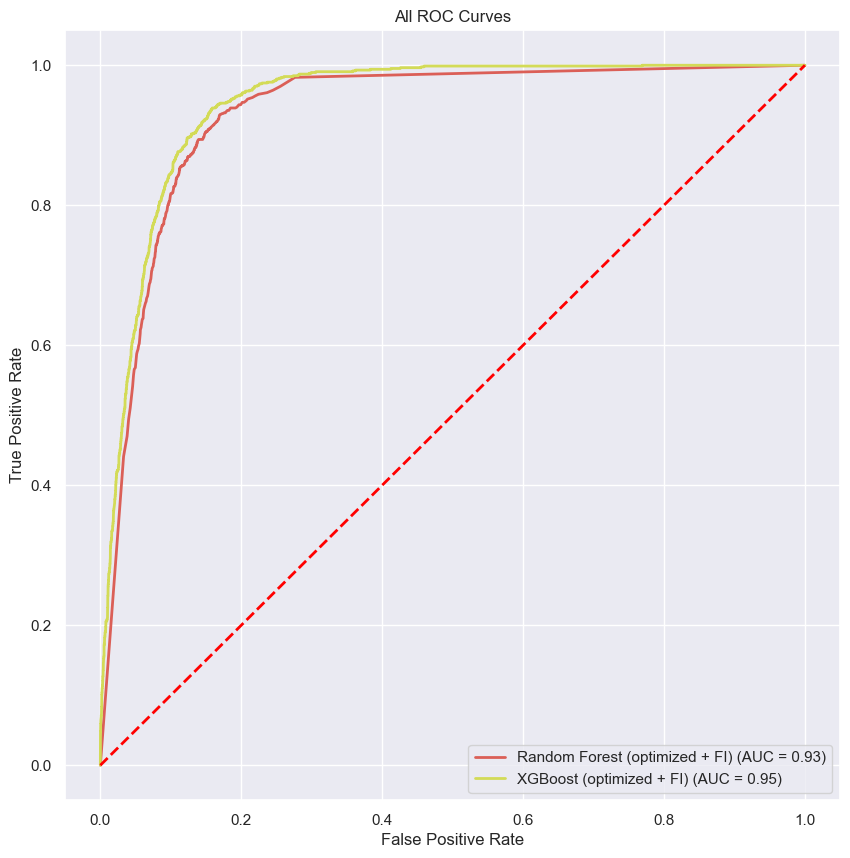

In [100]:
classifiers_optimozed_fi = {
    'Random Forest (optimized + FI)': RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300),
    'XGBoost (optimized + FI)': XGBClassifier(learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.8),
}

results = test_models(classifiers_optimozed_fi, X_resampled_fi,
                      X_test_fi, y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

### Dimensionality Reduction

In [68]:
df.shape

(39364, 41)

#### PCA

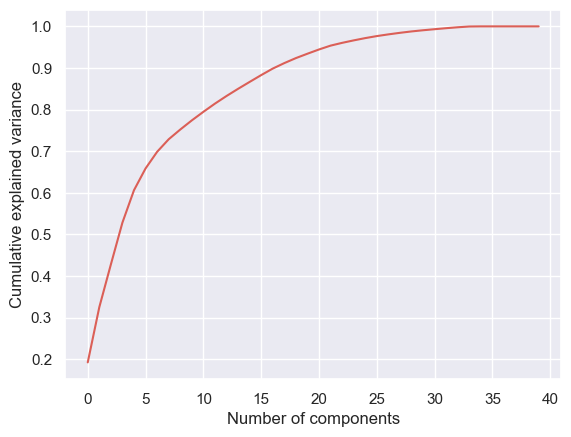

In [101]:
from sklearn.decomposition import PCA

pca = PCA(random_state=4242)
X_pca_train = pca.fit_transform(X_resampled)
X_pca_test = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [102]:
pca_95 = PCA(n_components=0.95, random_state=4242)
X_pca_train = pca_95.fit_transform(X_resampled)
X_pca_test = pca_95.transform(X_test)
X_pca_train.shape

(50558, 22)

Random Forest (optimized + PCA):DONE; XGBoost (optimized + PCA):DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
XGBoost (optimized + FI),NaN,NaN,NaN,0.945982,0.874508,0.612245
XGBoost (optimized),0.945564,0.88076,0.618766,0.945918,0.886193,0.627288
XGBoost (balanced),0.944638,0.890127,0.62445,0.945056,0.894957,0.635522
Random Forest (balanced),0.940116,0.879775,0.610268,0.941187,0.886066,0.625157
Random Forest (optimized),0.940129,0.883522,0.612231,0.941152,0.89102,0.629853
XGBoost (optimized + PCA),NaN,NaN,NaN,0.939427,0.857742,0.582712
SVC (balanced),0.937532,0.848941,0.570186,0.939416,0.857996,0.580645
Random Forest (optimized + PCA),NaN,NaN,NaN,0.935101,0.873873,0.595849
Random Forest (optimized + FI),NaN,NaN,NaN,0.931963,0.885939,0.618846


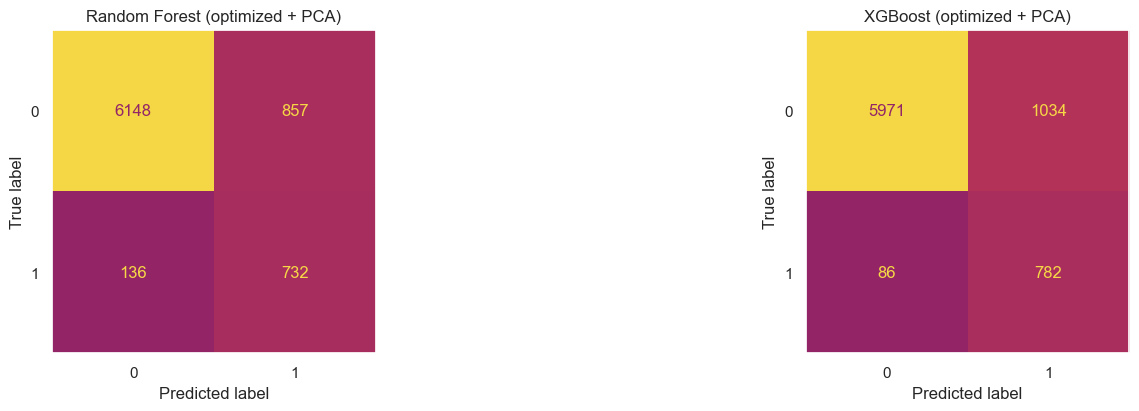

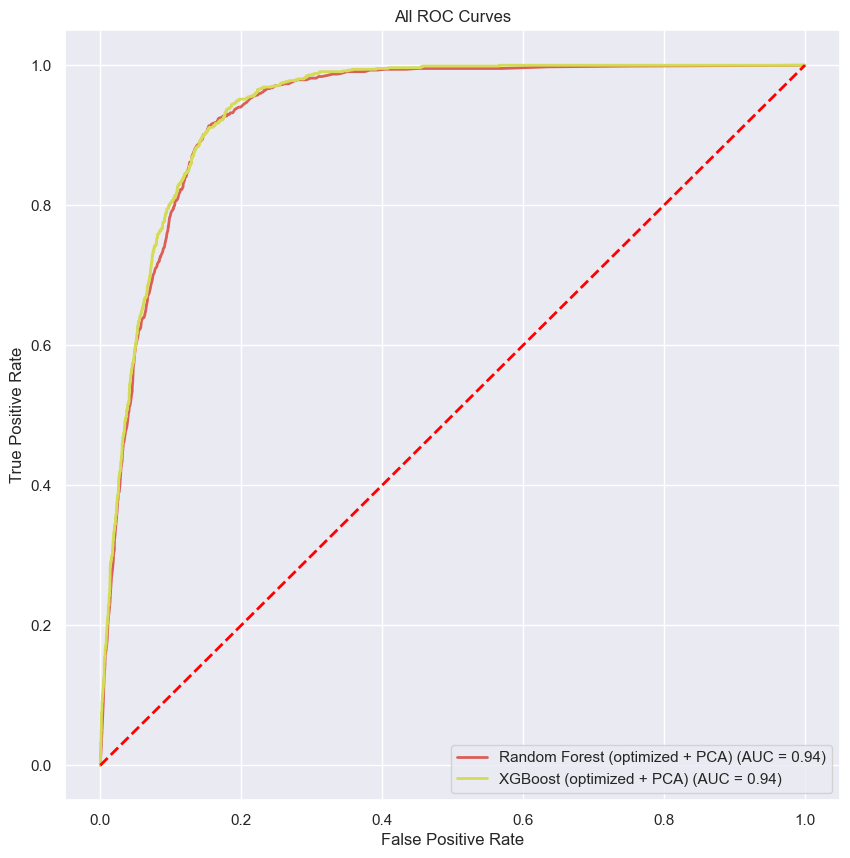

In [103]:
models = {
    'Random Forest (optimized + PCA)': RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300),
    'XGBoost (optimized + PCA)': XGBClassifier(learning_rate=0.15, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.8),
}

results = test_models(models, X_pca_train, X_pca_test,
                      y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

Voting (RF+XGB, optimized+FI):DONE; Voting (RF+XGB+SVC, optimized+FI):DONE; 

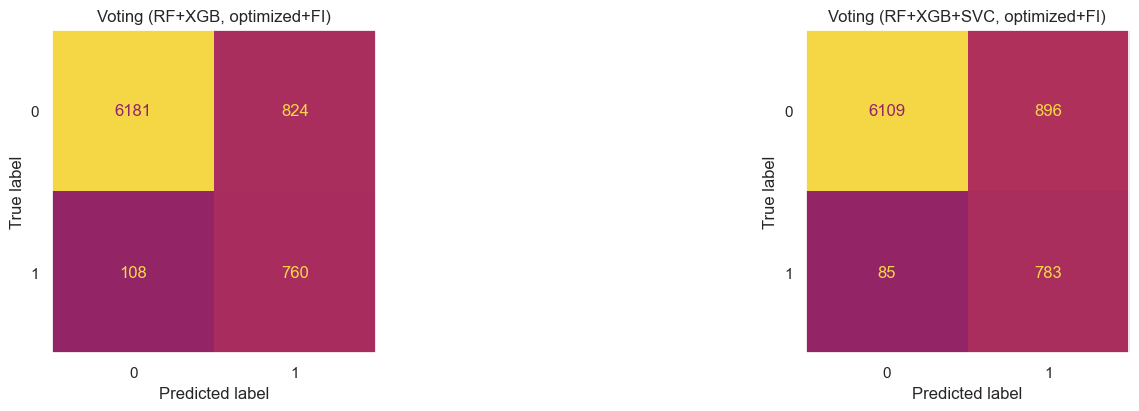

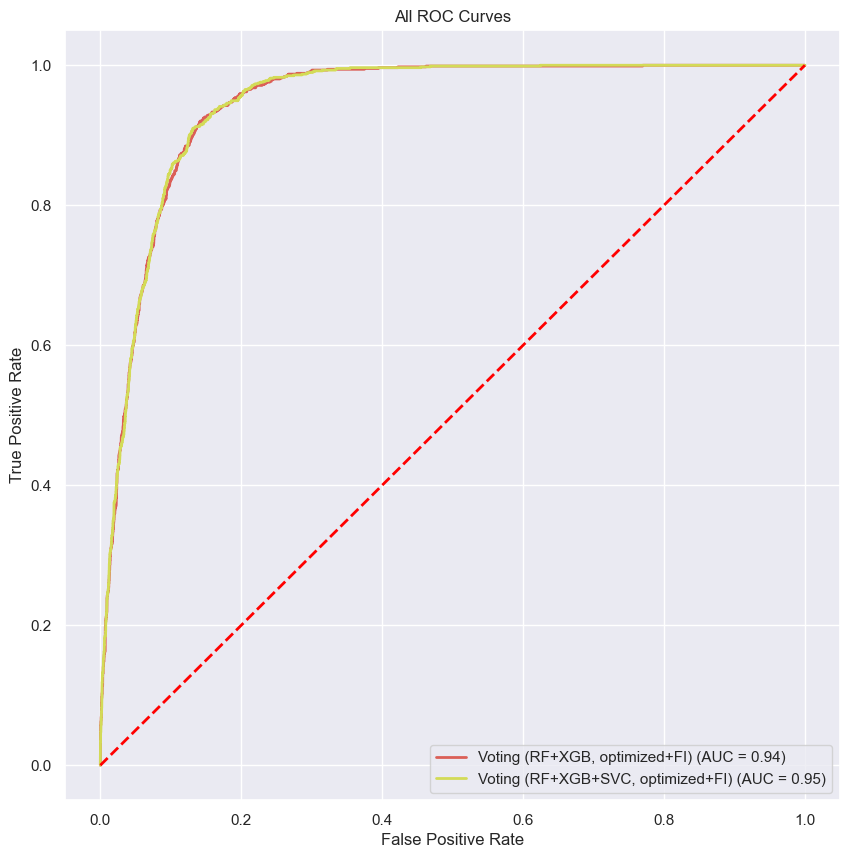

In [111]:
voting_clf = {
    'Voting (RF+XGB, optimized+FI)': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(bootstrap=False, max_depth=None,
                                      max_features='sqrt', min_samples_leaf=1,
                                      min_samples_split=2, n_estimators=300)),
        ('xgb', XGBClassifier(learning_rate=0.15, max_depth=7,
                              min_child_weight=1, n_estimators=50,
                              subsample=0.8))],
        voting='soft'),
    'Voting (RF+XGB+SVC, optimized+FI)': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(bootstrap=False, max_depth=None,
                                      max_features='sqrt', min_samples_leaf=1,
                                      min_samples_split=2, n_estimators=300)),
        ('xgb', XGBClassifier(learning_rate=0.15, max_depth=7, min_child_weight=1,
                              n_estimators=50, subsample=0.8)),
        ('svc', SVC(probability=True))],
        voting='soft'),

}

results = test_models(voting_clf, X_resampled_fi,
                      X_test_fi, y_resampled, y_test, results)

In [110]:
results.sort_values(by='AUC', ascending=False)

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
XGBoost (optimized + FI),NaN,NaN,NaN,0.945982,0.874508,0.612245
XGBoost (optimized),0.945564,0.88076,0.618766,0.945918,0.886193,0.627288
"Voting (RF+XGB+SVC, balanced+FI)",NaN,NaN,NaN,0.945444,0.875778,0.615868
"Voting (RF+XGB, balanced+FI)",NaN,NaN,NaN,0.945064,0.882129,0.621533
XGBoost (balanced),0.944638,0.890127,0.62445,0.945056,0.894957,0.635522
Random Forest (balanced),0.940116,0.879775,0.610268,0.941187,0.886066,0.625157
Random Forest (optimized),0.940129,0.883522,0.612231,0.941152,0.89102,0.629853
XGBoost (optimized + PCA),NaN,NaN,NaN,0.939427,0.857742,0.582712
SVC (balanced),0.937532,0.848941,0.570186,0.939416,0.857996,0.580645
